 Задача 

Требуется, на основании имеющихся данных о клиентах банка, построить модель, используя обучающий датасет, для прогнозирования невыполнения долговых обязательств по текущему кредиту. Выполнить прогноз для примеров из тестового датасета.

Требования к решению

Целевая метрика

F1 > 0.5
Метрика оценивается по качеству прогноза для главного класса (1 - просрочка по кредиту)

In [1]:
# Работа с данными
import pandas as pd
import numpy as np

# Визуализация данных
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data_path = 'C:/Users/grani/Desktop/Project_2/course_project_train.csv'

In [3]:
# Загрузим тренировочный набор даннх для первичного визуального анализа 
train_data = pd.read_csv(data_path)
train_data.head()

Home Ownership  Annual Income Years in current job  Tax Liens  \
0       Own Home       482087.0                  NaN        0.0   
1       Own Home      1025487.0            10+ years        0.0   
2  Home Mortgage       751412.0              8 years        0.0   
3       Own Home       805068.0              6 years        0.0   
4           Rent       776264.0              8 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   
1                     15.0                     15.3            1181730.0   
2                     11.0                     35.0            1182434.0   
3                      8.0                     22.5             147400.0   
4                     13.0                     13.6             385836.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        1.0                           NaN           1.0   
1                        0.0                           NaN           0.0   
2                        0.0                           NaN           0.0   
3                        1.0                           NaN           1.0   
4                        1.0                           NaN           0.0   

              Purpose        Term  Current Loan Amount  \
0  debt consolidation  Short Term           99999999.0   
1  debt consolidation   Long Term             264968.0   
2  debt consolidation  Short Term           99999999.0   
3  debt consolidation  Short Term             121396.0   
4  debt consolidation  Short Term             125840.0   

   Current Credit Balance  Monthly Debt  Credit Score  Credit Default  
0                 47386.0        7914.0         749.0               0  
1                394972.0       18373.0         737.0               1  
2                308389.0       13651.0         742.0               0  
3                 95855.0       11338.0         694.0               0  
4                 93309.0        7180.0         719.0               0

In [4]:
train_data.tail().T

7495                7496        7497  \
Home Ownership                      Rent       Home Mortgage        Rent   
Annual Income                   402192.0           1533984.0   1878910.0   
Years in current job            < 1 year              1 year     6 years   
Tax Liens                            0.0                 0.0         0.0   
Number of Open Accounts              3.0                10.0        12.0   
Years of Credit History              8.5                26.5        32.1   
Maximum Open Credit             107866.0            686312.0   1778920.0   
Number of Credit Problems            0.0                 0.0         0.0   
Months since last delinquent         NaN                43.0         NaN   
Bankruptcies                         0.0                 0.0         0.0   
Purpose                            other  debt consolidation   buy a car   
Term                          Short Term           Long Term  Short Term   
Current Loan Amount             129360.0            444048.0  99999999.0   
Current Credit Balance           73492.0            456399.0    477812.0   
Monthly Debt                      1900.0             12783.0     12479.0   
Credit Score                       697.0              7410.0       748.0   
Credit Default                         0                   1           0   

                                            7498                7499  
Home Ownership                     Home Mortgage                Rent  
Annual Income                                NaN                 NaN  
Years in current job                         NaN             4 years  
Tax Liens                                    0.0                 0.0  
Number of Open Accounts                     21.0                 8.0  
Years of Credit History                     26.5                 9.4  
Maximum Open Credit                    1141250.0            480832.0  
Number of Credit Problems                    0.0                 0.0  
Months since last delinquent                 NaN                 NaN  
Bankruptcies                                 0.0                 0.0  
Purpose                       debt consolidation  debt consolidation  
Term                                  Short Term          Short Term  
Current Loan Amount                     615274.0             26928.0  
Current Credit Balance                  476064.0            288192.0  
Monthly Debt                             37118.0              9061.0  
Credit Score                                 NaN                 NaN  
Credit Default                                 0                   0

Первичный визуальный анализ показывает, что в тренировочном наборе имеются нулевые значения, пропущенные значения,  ряд категориальных перменных, ряд колличественных перменных.

Проведем дальнейшие исследования.

In [5]:
# Форма исходного набора данных
print("Форма исходного набора данных:\n{}".format(train_data.shape))

Форма исходного набора данных:
(7500, 17)


In [6]:
# Список столбцов
train_data.columns.tolist()

['Home Ownership',
 'Annual Income',
 'Years in current job',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Purpose',
 'Term',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
 'Credit Default']

In [7]:
# Анализ типов данных
train_data.dtypes

Home Ownership                   object
Annual Income                   float64
Years in current job             object
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Purpose                          object
Term                             object
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
Credit Default                    int64
dtype: object

In [8]:
# Общая информация о наборе данных 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

Выводы
Набор имеет 17 переменных и 7500 наблюдений.
В столбцах Annual Income, Years in current job, Months since last delinquent, Bankruptcies, Credit Score колличество наблюдений меньше, чем 7500.
Переменные Home Ownership, Years in current job, Purpose, Term имеют тип данных object.
Переменная Credit Default имеет тип данных int64.
Оставшиеся 12 переменных имеют тип данныз float64.

Описание датасета
Home Ownership - домовладение
Annual Income - годовой доход
Years in current job - количество лет на текущем месте работы
Tax Liens - налоговые обременения
Number of Open Accounts - количество открытых счетов
Years of Credit History - количество лет кредитной истории
Maximum Open Credit - наибольший открытый кредит
Number of Credit Problems - количество проблем с кредитом
Months since last delinquent - количество месяцев с последней просрочки платежа
Bankruptcies - банкротства
Purpose - цель кредита
Term - срок кредита
Current Loan Amount - текущая сумма кредита
Current Credit Balance - текущий кредитный баланс
Monthly Debt - ежемесячный долг
Credit Score - кредитная оценка
Credit Default - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

Описание типов переменных
Home Ownership - категориальная перменная
Annual Income - количественная переменная
Years in current job - категориальная перменная
Tax Liens - категориальная перменная
Number of Open Accounts - количественная переменная
Years of Credit History - количественная переменная
Maximum Open Credit - количественная переменная
Number of Credit Problems - количественная переменная или категориальная перменная - необходим дальнейший анализ
Months since last delinquent - количественная переменная
Bankruptcies - банкротства - количественная переменная или категориальная перменная - необходим дальнейший анализ
Purpose - категориальная перменная
Term - категориальная перменная
Current Loan Amount - количественная переменная
Current Credit Balance - количественная переменная
Monthly Debt - количественная переменная
Credit Score - количественная переменная
Credit Default - категориальная перменная
Итого

Категориальные переменные
Home Ownership
Years in current job
Tax Liens
Purpose
Term
Credit Default
Количественные переменные
Annual Income
Number of Open Accounts
Years of Credit History
Maximum Open Credit
Months since last delinquent
Current Loan Amount
Current Credit Balance
Monthly Debt
Credit Score
Требуются дополнительные исследования
Number of Credit Problems
Bankruptcies

In [9]:
# Функция коплексной оценки качества данных 
def verify_data_quality (evaluated_dataset):
    # Проверка типов данных
    print("Типы данных:\n{}\n".format(evaluated_dataset.dtypes))
    # Проверка наличия значений NaN
    print("Пропущенные значения:\n{}\n".format(evaluated_dataset.isnull().sum().sum()))
    # Количество значений, отличных от NaN
    print("Количество значений, отличных от NaN:\n{}\n".format(evaluated_dataset.count().sum()))
    # Поиск дублирующих строк 
    print("Дублирующих строк:\n{}\n".format(evaluated_dataset.duplicated().sum()))
    # Форма нарбора данных
    print("Форма нарбора данных:\n{}\n".format(evaluated_dataset.shape))
    # Тип индекса набора данных
    print("Тип индекса набора данных:\n{}\n".format(evaluated_dataset.index))

In [10]:
# Оценка качетва данных
verify_data_quality(train_data)

Типы данных:
Home Ownership                   object
Annual Income                   float64
Years in current job             object
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Purpose                          object
Term                             object
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
Credit Default                    int64
dtype: object

Пропущенные значения:
7580

Количество значений, отличных от NaN:
119920

Дублирующих строк:
0

Форма нарбора данных:
(7500, 17)

Тип индекса набора данных:
RangeIndex(start=0, stop=7500, step=1)



Выводы:
Тренировочный набор данных имеет:

6 катеориальных переменных
9 колличественных переменных
2 переменные которые можно оценить как категориальные так и числовые, необходим дальнейший анализ
Набор имеет 17 переменных и 7500 наблюдений.
В столбцах Annual Income, Years in current job, Months since last delinquent, Bankruptcies, Credit Score колличество наблюдений меньше, чем 7500.
Переменные Home Ownership, Years in current job, Purpose, Term имеют тип данных object.
Переменная Credit Default имеет тип данных int64.
Оставшиеся 12 переменных имеют тип данныз float64.
7580 пропущенных значений
119920 отличных от NaN
Дублирующих строк нет
Индекс типа RangeIndex, непрерывный с шагом 1

# # Обработка данных

Имена переменных начинаются с большой буквы и содержат пробелы, для корректной работы переименуем перменные к стандартной форме.

In [11]:
# Приведение имен переменных к принятой для анализа форме 
train_data.columns = [i.replace(' ', '_').lower() for i in train_data.columns]

In [12]:
# Проверка результата переиминования
train_data.columns.tolist()

['home_ownership',
 'annual_income',
 'years_in_current_job',
 'tax_liens',
 'number_of_open_accounts',
 'years_of_credit_history',
 'maximum_open_credit',
 'number_of_credit_problems',
 'months_since_last_delinquent',
 'bankruptcies',
 'purpose',
 'term',
 'current_loan_amount',
 'current_credit_balance',
 'monthly_debt',
 'credit_score',
 'credit_default']

In [13]:
# Анализ уникальных значений 
train_data['number_of_credit_problems'].unique()

array([1., 0., 3., 2., 6., 4., 5., 7.])

In [14]:
# Колличество значений 
train_data['number_of_credit_problems'].value_counts()

0.0    6469
1.0     882
2.0      93
3.0      35
4.0       9
5.0       7
6.0       4
7.0       1
Name: number_of_credit_problems, dtype: int64

Фактически переменная number_of_credit_problems является категориальной порядковой переменной принимающей значения от 0 до 7.

In [15]:
# Анализ уникальных значений 
train_data['bankruptcies'].unique()

array([ 1.,  0.,  3., nan,  2.,  4.])

In [16]:
# Колличество значений 
train_data['bankruptcies'].value_counts()

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: bankruptcies, dtype: int64

Переменная bankruptcies так же является категориальной порядковой переменной принимающей значения от 0 до 4.

После уточнения типов премеменных получаем следующий результат.

Категориальные переменные

home_ownership
years_in_current_job
tax_liens
number_of_credit_problems
bankruptcies
purpose
term
credit_default
Колличественные переменные

annual_income
number_of_open_accounts
years_of_credit_history
maximum_open_credit
months_since_last_delinquent
current_loan_amount
current_credit_balance
monthly_debt
credit_score

Исследуем категориальные переменные

In [17]:
# Создадим отлельный набор для категориальных пепеменных
train_data_cat = train_data[['home_ownership',
                             'years_in_current_job',
                             'tax_liens',
                             'number_of_credit_problems',
                             'bankruptcies',
                             'purpose',
                             'term',
                             'credit_default']]

In [18]:
train_data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   home_ownership             7500 non-null   object 
 1   years_in_current_job       7129 non-null   object 
 2   tax_liens                  7500 non-null   float64
 3   number_of_credit_problems  7500 non-null   float64
 4   bankruptcies               7486 non-null   float64
 5   purpose                    7500 non-null   object 
 6   term                       7500 non-null   object 
 7   credit_default             7500 non-null   int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 468.9+ KB


In [19]:
train_data_cat.head()

home_ownership years_in_current_job  tax_liens  number_of_credit_problems  \
0       Own Home                  NaN        0.0                        1.0   
1       Own Home            10+ years        0.0                        0.0   
2  Home Mortgage              8 years        0.0                        0.0   
3       Own Home              6 years        0.0                        1.0   
4           Rent              8 years        0.0                        1.0   

   bankruptcies             purpose        term  credit_default  
0           1.0  debt consolidation  Short Term               0  
1           0.0  debt consolidation   Long Term               1  
2           0.0  debt consolidation  Short Term               0  
3           1.0  debt consolidation  Short Term               0  
4           0.0  debt consolidation  Short Term               0

In [20]:
# Приведем переменные к типу данных category
train_data_cat = train_data_cat.astype('category')

In [21]:
# Оценим получившийся результат
train_data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   home_ownership             7500 non-null   category
 1   years_in_current_job       7129 non-null   category
 2   tax_liens                  7500 non-null   category
 3   number_of_credit_problems  7500 non-null   category
 4   bankruptcies               7486 non-null   category
 5   purpose                    7500 non-null   category
 6   term                       7500 non-null   category
 7   credit_default             7500 non-null   category
dtypes: category(8)
memory usage: 61.1 KB


Исследуем колличественные переменные

In [22]:
# Создадим отлельный набор для колличественных пепеменных
train_data_num = train_data[['annual_income',
                             'number_of_open_accounts',
                             'years_of_credit_history',
                             'maximum_open_credit',
                             'months_since_last_delinquent',
                             'current_loan_amount',
                             'current_credit_balance',
                             'monthly_debt',
                             'credit_score']]

In [23]:
train_data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   annual_income                 5943 non-null   float64
 1   number_of_open_accounts       7500 non-null   float64
 2   years_of_credit_history       7500 non-null   float64
 3   maximum_open_credit           7500 non-null   float64
 4   months_since_last_delinquent  3419 non-null   float64
 5   current_loan_amount           7500 non-null   float64
 6   current_credit_balance        7500 non-null   float64
 7   monthly_debt                  7500 non-null   float64
 8   credit_score                  5943 non-null   float64
dtypes: float64(9)
memory usage: 527.5 KB


In [24]:
train_data_num.head()

annual_income  number_of_open_accounts  years_of_credit_history  \
0       482087.0                     11.0                     26.3   
1      1025487.0                     15.0                     15.3   
2       751412.0                     11.0                     35.0   
3       805068.0                      8.0                     22.5   
4       776264.0                     13.0                     13.6   

   maximum_open_credit  months_since_last_delinquent  current_loan_amount  \
0             685960.0                           NaN           99999999.0   
1            1181730.0                           NaN             264968.0   
2            1182434.0                           NaN           99999999.0   
3             147400.0                           NaN             121396.0   
4             385836.0                           NaN             125840.0   

   current_credit_balance  monthly_debt  credit_score  
0                 47386.0        7914.0         749.0  
1                394972.0       18373.0         737.0  
2                308389.0       13651.0         742.0  
3                 95855.0       11338.0         694.0  
4                 93309.0        7180.0         719.0

In [25]:
train_data_num.tail()

annual_income  number_of_open_accounts  years_of_credit_history  \
7495       402192.0                      3.0                      8.5   
7496      1533984.0                     10.0                     26.5   
7497      1878910.0                     12.0                     32.1   
7498            NaN                     21.0                     26.5   
7499            NaN                      8.0                      9.4   

      maximum_open_credit  months_since_last_delinquent  current_loan_amount  \
7495             107866.0                           NaN             129360.0   
7496             686312.0                          43.0             444048.0   
7497            1778920.0                           NaN           99999999.0   
7498            1141250.0                           NaN             615274.0   
7499             480832.0                           NaN              26928.0   

      current_credit_balance  monthly_debt  credit_score  
7495                 73492.0        1900.0         697.0  
7496                456399.0       12783.0        7410.0  
7497                477812.0       12479.0         748.0  
7498                476064.0       37118.0           NaN  
7499                288192.0        9061.0           NaN

Колличественные переменные переменные имеют идентичный тип данных float64 и в дополнительных манипуляциях не нуждаются.

In [26]:
## Классификация и перекодировка

Для использования категориальных переменных в моделях классификации необходимо закодировать значение каждой переменной в цифровой вид. Для этого необходимо произвести более детальный анализ, классификацию и перекодировку.

Введем следующие обозначение типов категориальных перменных.

Бинарные
Номинальные
Порядковые

In [27]:
# Список категориальных пермемнных
train_data_cat.columns.to_list()

['home_ownership',
 'years_in_current_job',
 'tax_liens',
 'number_of_credit_problems',
 'bankruptcies',
 'purpose',
 'term',
 'credit_default']

In [28]:
# Вывод уникальных значений переменной 
print("Уникальные значения переменной:\n{}".format(train_data_cat['home_ownership'].sort_values().unique().to_list()))

Уникальные значения переменной:
['Have Mortgage', 'Home Mortgage', 'Own Home', 'Rent']


Значение перемеременной Have Mortgage и Home Mortgage фактически отражают один и тот же аспект реальности наличие дома в ипотеку, поэтому их можно объеденить в один признак. Тогда у нас останиться три признака "Mortgage', 'Own Home', 'Rent'.

In [29]:
# Словарь для кодирования перменной 
home_ownership_dict = {'Have Mortgage' : 0,
                       'Home Mortgage' : 0,  
                            'Own Home' : 1, 
                                'Rent' : 2}

In [30]:
# Кодирование перменной 
train_data_cat['home_ownership']= train_data_cat['home_ownership'].map(home_ownership_dict)

In [31]:
# Проверка результата 
print("Уникальные значения переменной:\n{}".format(train_data_cat['home_ownership'].sort_values().unique()))

Уникальные значения переменной:
[0 1 2]


In [32]:
# Вывод уникальных значений переменной 
print("Уникальные значения переменной:\n{}".format(train_data_cat['years_in_current_job'].sort_values().unique().to_list()))

Уникальные значения переменной:
['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '< 1 year', nan]


In [33]:

# Словарь для кодирования перменной 
years_in_current_job_dict = {'< 1 year' : 0,
                             '1 year' : 1,  
                             '2 years' : 2, 
                             '3 years' : 3, 
                             '4 years' : 4, 
                             '5 years' : 5, 
                             '6 years' : 6, 
                             '7 years' : 7, 
                             '8 years' : 8, 
                             '9 years' : 9,
                             '10+ years' : 10}

In [34]:
# Кодирование перменной 
train_data_cat['years_in_current_job']= train_data_cat['years_in_current_job'].map(years_in_current_job_dict)

In [35]:
# Проверка результата 
print("Уникальные значения переменной:\n{}".format(train_data_cat['years_in_current_job'].sort_values().unique().to_list()))

Уникальные значения переменной:
[1, 10, 2, 3, 4, 5, 6, 7, 8, 9, 0, nan]


In [36]:
# Вывод уникальных значений переменной 
print("Уникальные значения переменной:\n{}".format(train_data_cat['tax_liens'].sort_values().unique().to_list()))

Уникальные значения переменной:
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]


In [37]:
# Вывод уникальных значений переменной 
print("Уникальные значения переменной:\n{}".format(train_data_cat['number_of_credit_problems'].sort_values().unique().to_list()))

Уникальные значения переменной:
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]


In [38]:
# Вывод уникальных значений переменной 
print("Уникальные значения переменной:\n{}".format(train_data_cat['bankruptcies'].sort_values().unique().to_list()))


Уникальные значения переменной:
[0.0, 1.0, 2.0, 3.0, 4.0, nan]


In [39]:
# Вывод уникальных значений переменной 
print("Уникальные значения переменной:\n{}".format(train_data_cat['purpose'].sort_values().unique().to_list()))

Уникальные значения переменной:
['business loan', 'buy a car', 'buy house', 'debt consolidation', 'educational expenses', 'home improvements', 'major purchase', 'medical bills', 'moving', 'other', 'renewable energy', 'small business', 'take a trip', 'vacation', 'wedding']


In [40]:
from sklearn.preprocessing import LabelEncoder
# Кодирование значений перменнной 
train_data_cat['purpose']= LabelEncoder().fit_transform(train_data_cat['purpose'])

In [41]:
# Проверка результата 
print("Уникальные значения переменной:\n{}".format(train_data_cat['purpose'].sort_values().unique()))

Уникальные значения переменной:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [42]:
# Вывод уникальных значений переменной 
print("Уникальные значения переменной:\n{}".format(train_data_cat['term'].sort_values().unique().to_list()))

Уникальные значения переменной:
['Long Term', 'Short Term']


In [43]:
# Бинарное кодирование переменной 
term_code, term_uniques =  pd.factorize(train_data_cat['term'])

In [44]:
# Проверка результата 
print("Закодированные категрии:\n{}\n".format(term_uniques))
print("Закодированные значения:\n{}\n".format(term_code))
print("Декодирование значений:\n{}".format(term_uniques.take(term_code)))

Закодированные категрии:
CategoricalIndex(['Short Term', 'Long Term'], categories=['Long Term', 'Short Term'], ordered=False, dtype='category')

Закодированные значения:
[0 1 0 ... 0 0 0]

Декодирование значений:
CategoricalIndex(['Short Term', 'Long Term', 'Short Term', 'Short Term',
                  'Short Term', 'Long Term', 'Short Term', 'Short Term',
                  'Short Term', 'Long Term',
                  ...
                  'Short Term', 'Short Term', 'Short Term', 'Long Term',
                  'Short Term', 'Short Term', 'Long Term', 'Short Term',
                  'Short Term', 'Short Term'],
                 categories=['Long Term', 'Short Term'], ordered=False, dtype='category', length=7500)


In [45]:
# Замена значений в наборе данных 
train_data_cat['term'] = term_code
train_data_cat['term'].head()

0    0
1    1
2    0
3    0
4    0
Name: term, dtype: int64

In [46]:
# Вывод уникальных значений переменной 
print("Уникальные значения переменной:\n{}".format(train_data_cat['credit_default'].sort_values().unique().to_list()))

Уникальные значения переменной:
[0, 1]


Сводный анализ типов категориальных перменных.

Бинарные
credit_default,
term

Номинальные
home_ownership,
purpose

Порядковые
years_in_current_job,
tax_liens,
number_of_credit_problems,
bankruptcies.

# Переназначение

Переупорядочем тренировачные данные следующим образом:

Бинарные категориальные признаки

credit_default
term Номинальные категориальные признаки
home_ownership
purpose Порядковые категориальные признаки
years_in_current_job
tax_liens
number_of_open_accounts
bankruptcies Колличественные переменные
number_of_credit_problems
annual_income
maximum_open_credit
current_loan_amount
current_credit_balance
monthly_debt
credit_score
years_of_credit_history
months_since_last_delinquent

In [47]:
# Объеденим train_data_cat и train_data_num обратно в общий набор данных 
train_data_reord = pd.concat([train_data_cat, train_data_num], axis=1)

In [48]:
# Переупорядочим переменные 
train_data_reord = train_data_reord[['credit_default',
                                     'term',
                                     'home_ownership',
                                     'purpose',
                                     'years_in_current_job',
                                     'tax_liens',
                                     'number_of_open_accounts',
                                     'bankruptcies',
                                     'number_of_credit_problems',
                                     'annual_income',
                                     'maximum_open_credit',
                                     'current_loan_amount',
                                     'current_credit_balance',
                                     'monthly_debt',
                                     'credit_score',
                                     'years_of_credit_history',
                                     'months_since_last_delinquent']]

In [49]:
# Оценим полученный результат
train_data_reord.head(15).T

0          1           2         3   \
credit_default                       0.0        1.0         0.0       0.0   
term                                 0.0        1.0         0.0       0.0   
home_ownership                       1.0        1.0         0.0       1.0   
purpose                              3.0        3.0         3.0       3.0   
years_in_current_job                 NaN       10.0         8.0       6.0   
tax_liens                            0.0        0.0         0.0       0.0   
number_of_open_accounts             11.0       15.0        11.0       8.0   
bankruptcies                         1.0        0.0         0.0       1.0   
number_of_credit_problems            1.0        0.0         0.0       1.0   
annual_income                   482087.0  1025487.0    751412.0  805068.0   
maximum_open_credit             685960.0  1181730.0   1182434.0  147400.0   
current_loan_amount           99999999.0   264968.0  99999999.0  121396.0   
current_credit_balance           47386.0   394972.0    308389.0   95855.0   
monthly_debt                      7914.0    18373.0     13651.0   11338.0   
credit_score                       749.0      737.0       742.0     694.0   
years_of_credit_history             26.3       15.3        35.0      22.5   
months_since_last_delinquent         NaN        NaN         NaN       NaN   

                                    4         5           6          7   \
credit_default                     0.0       1.0         0.0        1.0   
term                               0.0       1.0         0.0        0.0   
home_ownership                     2.0       2.0         0.0        2.0   
purpose                            3.0       9.0         5.0        9.0   
years_in_current_job               8.0       7.0        10.0       10.0   
tax_liens                          0.0       0.0         0.0        0.0   
number_of_open_accounts           13.0      12.0         9.0       13.0   
bankruptcies                       0.0       0.0         0.0        0.0   
number_of_credit_problems          1.0       0.0         0.0        0.0   
annual_income                 776264.0       NaN   1511108.0  1040060.0   
maximum_open_credit           385836.0  366784.0    388124.0   330374.0   
current_loan_amount           125840.0  337304.0  99999999.0   250888.0   
current_credit_balance         93309.0  165680.0     51623.0    89015.0   
monthly_debt                    7180.0   18692.0      2317.0    19761.0   
credit_score                     719.0       NaN       745.0      705.0   
years_of_credit_history           13.6      14.6        20.3       12.0   
months_since_last_delinquent       NaN       NaN        73.0       18.0   

                                    8         9         10         11  \
credit_default                     0.0       1.0       0.0        0.0   
term                               0.0       1.0       0.0        0.0   
home_ownership                     0.0       0.0       0.0        0.0   
purpose                            5.0       3.0       3.0        3.0   
years_in_current_job               5.0       1.0       0.0        4.0   
tax_liens                          0.0       0.0       0.0        0.0   
number_of_open_accounts           17.0      10.0       7.0       12.0   
bankruptcies                       1.0       0.0       0.0        0.0   
number_of_credit_problems          1.0       0.0       0.0        0.0   
annual_income                      NaN       NaN       NaN  1828560.0   
maximum_open_credit                0.0  511302.0  256322.0   839080.0   
current_loan_amount           129734.0  572880.0  220858.0   441100.0   
current_credit_balance            19.0  205333.0  187492.0   402914.0   
monthly_debt                      17.0   17613.0   14592.0    15528.0   
credit_score                       NaN       NaN       NaN      737.0   
years_of_credit_history           15.7      24.6      11.5       17.6   
months_since_last_delinquent       NaN       6.0       NaN 

In [50]:
# Оценим наличие пропущенных значений. 
train_data_reord.isna().sum()

credit_default                     0
term                               0
home_ownership                     0
purpose                            0
years_in_current_job             371
tax_liens                          0
number_of_open_accounts            0
bankruptcies                      14
number_of_credit_problems          0
annual_income                   1557
maximum_open_credit                0
current_loan_amount                0
current_credit_balance             0
monthly_debt                       0
credit_score                    1557
years_of_credit_history            0
months_since_last_delinquent    4081
dtype: int64


Оценка показывает, что следующие перменные имеют пропущенные значения:

years_in_current_job
bankruptcies
annual_income
credit_score
months_since_last_delinquent
Исследуем каждую переменную более детально для того чтобы определить наилучшую стратегию заполнения пропусков.

In [51]:
# Оценка пропусков категориальных данных
def estimation_missing_cat_data(data):
    # Колличество пропусков 
    print("Колличество пропусков:\n{}\n".format(data.isna().sum()) + '_' * 100+ '\n')
    # Уникальные значения 
    print("Уникальные значения:\n{}\n".format(data.sort_values().unique().tolist()) + '_' * 100+ '\n')
    # Суммарное колличество каждого значения 
    print("Суммарное колличество каждого значения:\n{}\n".format(data.value_counts()) + '_' * 100+ '\n')
    # Описательные статистики 
    print("Описательные статистики:\n{}\n".format(data.describe()) + '_' * 100+ '\n')

In [52]:
# Оценка пропусков данных
estimation_missing_cat_data(train_data_reord['years_in_current_job'])

Колличество пропусков:
371
____________________________________________________________________________________________________

Уникальные значения:
[1, 10, 2, 3, 4, 5, 6, 7, 8, 9, 0, nan]
____________________________________________________________________________________________________

Суммарное колличество каждого значения:
10    2332
2      705
3      620
0      563
5      516
1      504
4      469
6      426
7      396
8      339
9      259
Name: years_in_current_job, dtype: int64
____________________________________________________________________________________________________

Описательные статистики:
count     7129
unique      11
top         10
freq      2332
Name: years_in_current_job, dtype: int64
____________________________________________________________________________________________________



Переменная years_in_current_job - категориальная и имеет 371 пропущеннное значение.
Самыми распрастраннеными стратегиями заполнения пропущенных категриальных значений являются заполнение константой или самым частым значением. Заменим пропущенные значения на самое частое значение.

In [53]:
# Замена пропущенных значений на самое частое
# train_data_reord['years_in_current_job'] = train_data_reord['years_in_current_job'].cat.add_categories(['Unknown'])
train_data_reord['years_in_current_job'] = train_data_reord['years_in_current_job'].fillna(10)

In [54]:
# Проверим результат. 
train_data_reord['years_in_current_job'].isna().sum()

0

In [55]:
# Оценка пропусков данных
estimation_missing_cat_data(train_data_reord['bankruptcies'])

Колличество пропусков:
14
____________________________________________________________________________________________________

Уникальные значения:
[0.0, 1.0, 2.0, 3.0, 4.0, nan]
____________________________________________________________________________________________________

Суммарное колличество каждого значения:
0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: bankruptcies, dtype: int64
____________________________________________________________________________________________________

Описательные статистики:
count     7486.0
unique       5.0
top          0.0
freq      6660.0
Name: bankruptcies, dtype: float64
____________________________________________________________________________________________________



Переменная bankruptcies имеет 14 пропусков, при этом самое часто встречающиеся значение 0. Заменим пропущенные значения 0.

In [56]:
train_data_reord['bankruptcies'] = train_data_reord['bankruptcies'].fillna(0)

In [57]:
# Проверим результат. 
train_data_reord['bankruptcies'].isna().sum()

0

In [58]:
# Оценка пропусков колличественных данных
def estimation_missing_num_data(data):
    # Колличество пропусков 
    print("Колличество пропусков:\n{}\n".format(data.isna().sum()) + '-' * 100+ '\n')
    # Колличество значений  
    print("Колличество значений:\n{}\n".format(data.count()) + '-' * 100+ '\n')
    # Описательные статистики 
    print("Описательные статистики:\n{}\n".format(data.describe().round(2)) + '-' * 100+ '\n')
    # Значения    
    print("Значения:\n{}\n".format(data.values) + '-' * 100+ '\n')
    # Оценка плотности распределения
    data.plot.hist(bins=200, legend = True, density=True, grid = True, figsize = (20, 5), alpha = 0.5, title ='Оценка плотности распределения')
    data.plot(kind='kde', grid = True, figsize = (20, 5), style=['g', '#FF0000'])

Колличество пропусков:
1557
----------------------------------------------------------------------------------------------------

Колличество значений:
5943
----------------------------------------------------------------------------------------------------

Описательные статистики:
count        5943.00
mean      1366391.72
std        845339.20
min        164597.00
25%        844341.00
50%       1168386.00
75%       1640137.00
max      10149344.00
Name: annual_income, dtype: float64
----------------------------------------------------------------------------------------------------

Значения:
[ 482087. 1025487.  751412. ... 1878910.      nan      nan]
----------------------------------------------------------------------------------------------------



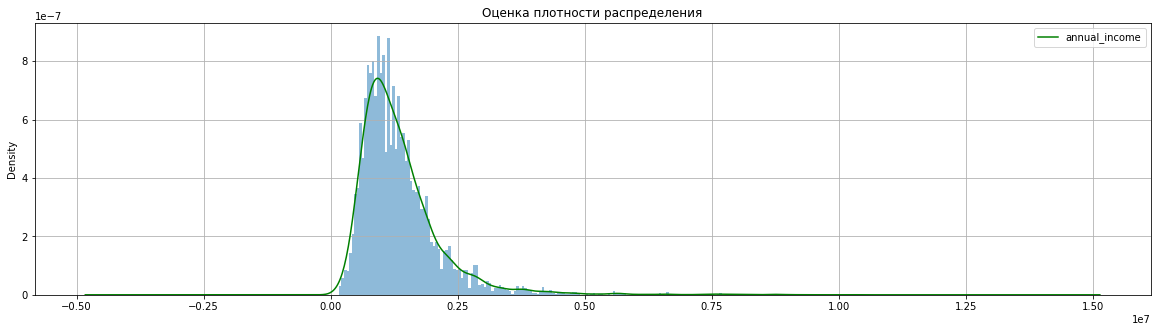

In [59]:
# Оценка пропусков данных
estimation_missing_num_data(train_data_reord['annual_income'])

In [60]:
# Заполним пропуски средним значением 
train_data_reord['annual_income'] = train_data_reord['annual_income'].fillna(train_data_reord['annual_income'].mean())

Колличество пропусков:
0
----------------------------------------------------------------------------------------------------

Колличество значений:
7500
----------------------------------------------------------------------------------------------------

Описательные статистики:
count        7500.00
mean      1366391.72
std        752481.20
min        164597.00
25%        931133.00
50%       1366391.72
75%       1499974.00
max      10149344.00
Name: annual_income, dtype: float64
----------------------------------------------------------------------------------------------------

Значения:
[ 482087.       1025487.        751412.       ... 1878910.
 1366391.720175 1366391.720175]
----------------------------------------------------------------------------------------------------



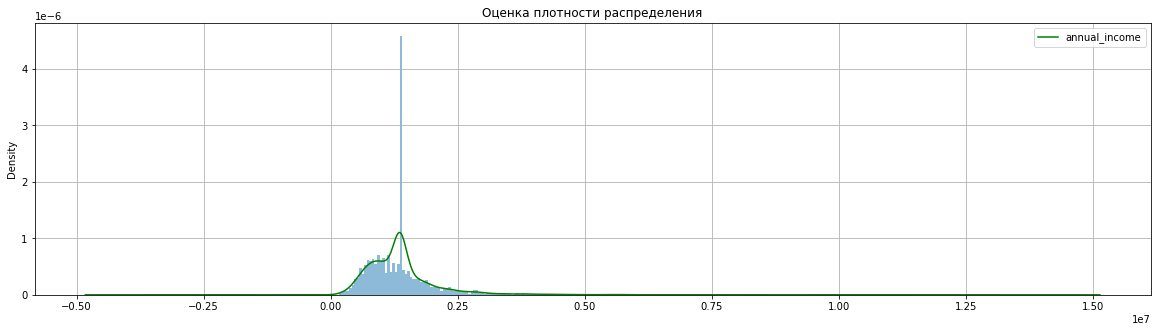

In [61]:
# Проверим результат. 
estimation_missing_num_data(train_data_reord['annual_income'])

Колличество пропусков:
1557
----------------------------------------------------------------------------------------------------

Колличество значений:
5943
----------------------------------------------------------------------------------------------------

Описательные статистики:
count    5943.00
mean     1151.09
std      1604.45
min       585.00
25%       711.00
50%       731.00
75%       743.00
max      7510.00
Name: credit_score, dtype: float64
----------------------------------------------------------------------------------------------------

Значения:
[749. 737. 742. ... 748.  nan  nan]
----------------------------------------------------------------------------------------------------



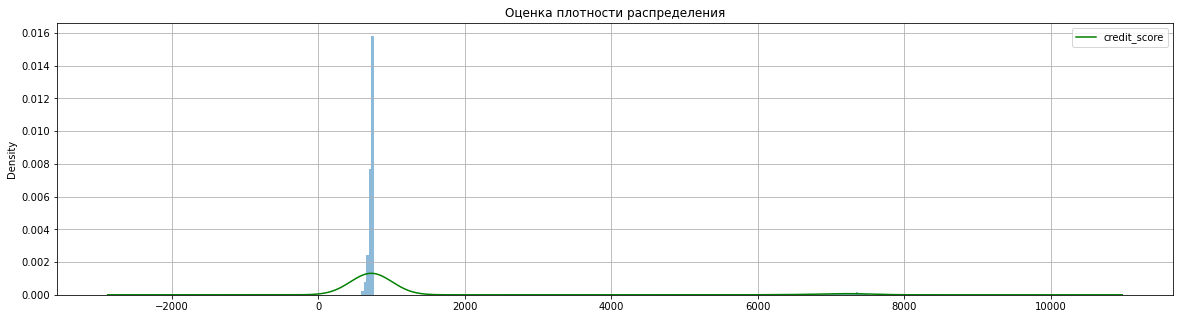

In [62]:
# Оценка пропусков данных
estimation_missing_num_data(train_data_reord['credit_score'])

In [63]:
# Заполним пропуски медианным значением 
train_data_reord['credit_score'] = train_data_reord['credit_score'].fillna(train_data_reord['credit_score'].median())

Колличество пропусков:
0
----------------------------------------------------------------------------------------------------

Колличество значений:
7500
----------------------------------------------------------------------------------------------------

Описательные статистики:
count    7500.00
mean     1063.88
std      1438.34
min       585.00
25%       718.00
50%       731.00
75%       740.00
max      7510.00
Name: credit_score, dtype: float64
----------------------------------------------------------------------------------------------------

Значения:
[749. 737. 742. ... 748. 731. 731.]
----------------------------------------------------------------------------------------------------



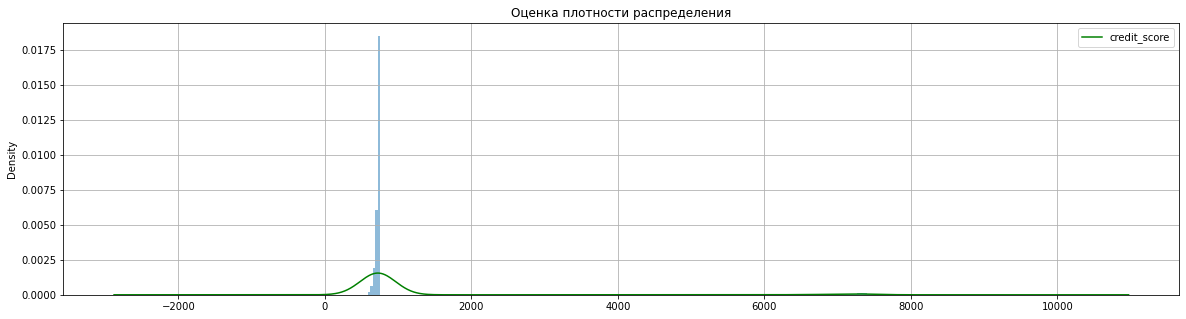

In [64]:

# Проверим результат.
estimation_missing_num_data(train_data_reord['credit_score'])

Колличество пропусков:
4081
----------------------------------------------------------------------------------------------------

Колличество значений:
3419
----------------------------------------------------------------------------------------------------

Описательные статистики:
count    3419.00
mean       34.69
std        21.69
min         0.00
25%        16.00
50%        32.00
75%        50.00
max       118.00
Name: months_since_last_delinquent, dtype: float64
----------------------------------------------------------------------------------------------------

Значения:
[nan nan nan ... nan nan nan]
----------------------------------------------------------------------------------------------------



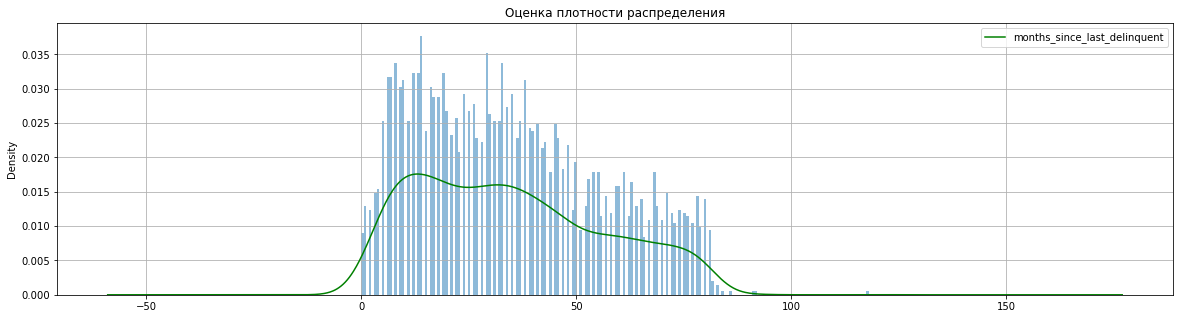

In [65]:
# Оценка пропусков данных
estimation_missing_num_data(train_data_reord['months_since_last_delinquent'])

In [66]:
# Заполним пропуски пропущенных значений 
train_data_reord['months_since_last_delinquent'] = train_data_reord['months_since_last_delinquent'].fillna(train_data_reord['months_since_last_delinquent'].median())

Колличество пропусков:
0
----------------------------------------------------------------------------------------------------

Колличество значений:
7500
----------------------------------------------------------------------------------------------------

Описательные статистики:
count    7500.00
mean       33.23
std        14.70
min         0.00
25%        32.00
50%        32.00
75%        32.00
max       118.00
Name: months_since_last_delinquent, dtype: float64
----------------------------------------------------------------------------------------------------

Значения:
[32. 32. 32. ... 32. 32. 32.]
----------------------------------------------------------------------------------------------------



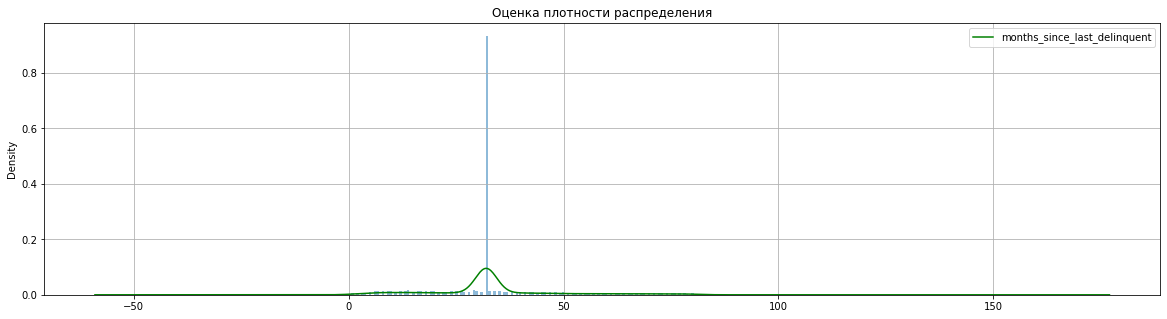

In [67]:
# Проверим результат.
estimation_missing_num_data(train_data_reord['months_since_last_delinquent'])

In [68]:
# Оценим наличие пропущенных значений после заполнения во всем наборе данных. 
train_data_reord.isna().sum()

credit_default                  0
term                            0
home_ownership                  0
purpose                         0
years_in_current_job            0
tax_liens                       0
number_of_open_accounts         0
bankruptcies                    0
number_of_credit_problems       0
annual_income                   0
maximum_open_credit             0
current_loan_amount             0
current_credit_balance          0
monthly_debt                    0
credit_score                    0
years_of_credit_history         0
months_since_last_delinquent    0
dtype: int64

In [69]:
train_data_reord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   credit_default                7500 non-null   category
 1   term                          7500 non-null   int64   
 2   home_ownership                7500 non-null   int64   
 3   purpose                       7500 non-null   int32   
 4   years_in_current_job          7500 non-null   category
 5   tax_liens                     7500 non-null   category
 6   number_of_open_accounts       7500 non-null   float64 
 7   bankruptcies                  7500 non-null   category
 8   number_of_credit_problems     7500 non-null   category
 9   annual_income                 7500 non-null   float64 
 10  maximum_open_credit           7500 non-null   float64 
 11  current_loan_amount           7500 non-null   float64 
 12  current_credit_balance        7500 non-null   fl

После всех предварительных трасфомаций и удаления пропущенных значения приведем категориальные переменные к типу int.

In [70]:
train_data_reord[['credit_default', 'years_in_current_job','tax_liens','bankruptcies','number_of_open_accounts', 'number_of_credit_problems']] = train_data_reord[['credit_default', 'years_in_current_job','tax_liens','bankruptcies','number_of_open_accounts', 'number_of_credit_problems']].astype(float)

In [71]:
train_data_reord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   credit_default                7500 non-null   float64
 1   term                          7500 non-null   int64  
 2   home_ownership                7500 non-null   int64  
 3   purpose                       7500 non-null   int32  
 4   years_in_current_job          7500 non-null   float64
 5   tax_liens                     7500 non-null   float64
 6   number_of_open_accounts       7500 non-null   float64
 7   bankruptcies                  7500 non-null   float64
 8   number_of_credit_problems     7500 non-null   float64
 9   annual_income                 7500 non-null   float64
 10  maximum_open_credit           7500 non-null   float64
 11  current_loan_amount           7500 non-null   float64
 12  current_credit_balance        7500 non-null   float64
 13  mon

# Оценим наличие дубллирующих значений.

In [72]:
print("Колличество дублирующих значений:\n{}".format(train_data_reord.duplicated().sum()))

Колличество дублирующих значений:
0


# Описательная статистика

In [73]:
# Переименуюем название набора данных для анализа
train_data_eda = train_data_reord

Раздели исходный подготовленный набора данных train_data_eda на два поднабора по типам признаков для детального анализа:

Категориальный набор признаков: train_data_eda_cat
Колличественный набор признаков: train_data_eda_num

In [74]:
# Выделим категориальные признаки в отдельный набор данных
train_data_eda_cat = train_data_eda[['home_ownership',
                                     'years_in_current_job',
                                     'tax_liens',
                                     'number_of_credit_problems',
                                     'bankruptcies',
                                     'purpose',
                                     'term',
                                     'credit_default']]

In [75]:
# Выделим колличественные признаки в отдельный набор данных
train_data_eda_num = train_data_eda[['annual_income',
                                     'number_of_open_accounts',
                                     'years_of_credit_history',
                                     'maximum_open_credit',
                                     'months_since_last_delinquent',
                                     'current_loan_amount',
                                     'current_credit_balance',
                                     'monthly_debt',
                                     'credit_score']]

In [76]:
# Изменение формата отаброжения чисел.
pd.options.display.float_format = '{:.2f}'.format

In [77]:
# Сводные описательные статистики
train_data_eda_num.describe()

annual_income  number_of_open_accounts  years_of_credit_history  \
count        7500.00                  7500.00                  7500.00   
mean      1366391.72                    11.13                    18.32   
std        752481.20                     4.91                     7.04   
min        164597.00                     2.00                     4.00   
25%        931133.00                     8.00                    13.50   
50%       1366391.72                    10.00                    17.00   
75%       1499974.00                    14.00                    21.80   
max      10149344.00                    43.00                    57.70   

       maximum_open_credit  months_since_last_delinquent  current_loan_amount  \
count              7500.00                       7500.00              7500.00   
mean             945153.73                         33.23          11873177.45   
std            16026216.67                         14.70          31926122.97   
min                   0.00                          0.00             11242.00   
25%              279229.50                         32.00            180169.00   
50%              478159.00                         32.00            309573.00   
75%              793501.50                         32.00            519882.00   
max          1304726170.00                        118.00          99999999.00   

       current_credit_balance  monthly_debt  credit_score  
count                 7500.00       7500.00       7500.00  
mean                289833.24      18314.45       1063.88  
std                 317871.38      11926.76       1438.34  
min                      0.00          0.00        585.00  
25%                 114256.50      10067.50        718.00  
50%                 209323.00      16076.50        731.00  
75%                 360406.25      23818.00        740.00  
max                6506797.00     136679.00       7510.00

In [78]:
# Смещение 
train_data_eda_num.skew()

annual_income                   3.40
number_of_open_accounts         1.12
years_of_credit_history         1.05
maximum_open_credit            74.19
months_since_last_delinquent    0.93
current_loan_amount             2.40
current_credit_balance          5.20
monthly_debt                    1.68
credit_score                    3.99
dtype: float64

In [79]:
# Эксцесс
train_data_eda_num.kurt()

annual_income                    21.91
number_of_open_accounts           2.24
years_of_credit_history           1.60
maximum_open_credit            5894.46
months_since_last_delinquent      2.08
current_loan_amount               3.75
current_credit_balance           52.95
monthly_debt                      5.83
credit_score                     13.97
dtype: float64

In [80]:
# Сводные описательные статистики
train_data_eda_cat.describe()

home_ownership  years_in_current_job  tax_liens  \
count         7500.00               7500.00    7500.00   
mean             0.94                  6.08       0.03   
std              0.95                  3.64       0.27   
min              0.00                  0.00       0.00   
25%              0.00                  3.00       0.00   
50%              1.00                  6.00       0.00   
75%              2.00                 10.00       0.00   
max              2.00                 10.00       7.00   

       number_of_credit_problems  bankruptcies  purpose    term  \
count                    7500.00       7500.00  7500.00 7500.00   
mean                        0.17          0.12     3.73    0.26   
std                         0.50          0.35     2.08    0.44   
min                         0.00          0.00     0.00    0.00   
25%                         0.00          0.00     3.00    0.00   
50%                         0.00          0.00     3.00    0.00   
75%                         0.00          0.00     3.00    1.00   
max                         7.00          4.00    14.00    1.00   

       credit_default  
count         7500.00  
mean             0.28  
std              0.45  
min              0.00  
25%              0.00  
50%              0.00  
75%              1.00  
max              1.00

In [81]:
# Смещение 
train_data_eda_cat.skew()

home_ownership               0.12
years_in_current_job        -0.26
tax_liens                   12.99
number_of_credit_problems    4.56
bankruptcies                 3.27
purpose                      2.16
term                         1.10
credit_default               0.97
dtype: float64

In [82]:
# Эксцесс
train_data_eda_cat.kurt()

home_ownership               -1.89
years_in_current_job         -1.46
tax_liens                   215.60
number_of_credit_problems    32.10
bankruptcies                 13.65
purpose                       4.42
term                         -0.79
credit_default               -1.06
dtype: float64

# Исследуем распределение колличественных переменных

In [83]:
# Список переменных
train_data_eda_num.columns.to_list()

['annual_income',
 'number_of_open_accounts',
 'years_of_credit_history',
 'maximum_open_credit',
 'months_since_last_delinquent',
 'current_loan_amount',
 'current_credit_balance',
 'monthly_debt',
 'credit_score']

In [84]:
def distribution_of_quantitative_variables(data_for_eda):
    
    fig, ax = plt.subplots(ncols=3, figsize=(25, 5))
    fig.subplots_adjust(wspace=0.15)
    plt.suptitle("Распределение переменной", fontsize=18)
    
    sns.histplot(data = data_for_eda, bins = 80, stat = 'density', kde = True, ax=ax[0])
    sns.boxenplot(data = data_for_eda, ax=ax[1])
    sns.scatterplot(data = data_for_eda, ax=ax[2])
    
    print("Описательные статистики:\n{}".format(data_for_eda.describe().round(2)))

In [85]:
annual_income = train_data_eda_num['annual_income']

Описательные статистики:
count       7500.00
mean     1366391.72
std       752481.20
min       164597.00
25%       931133.00
50%      1366391.72
75%      1499974.00
max     10149344.00
Name: annual_income, dtype: float64


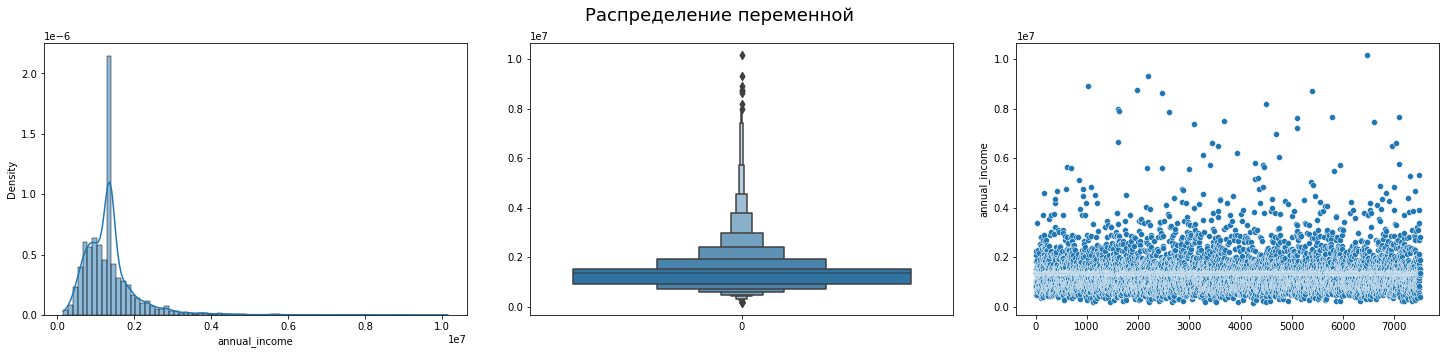

In [86]:
# Оценка распределения данных
distribution_of_quantitative_variables(annual_income)

Из графиков явно видно начличе выборосов значений переменной. Так же набдлюдается сущетсвнны разрыв между 75-м процетилем и максимальным значением. Медиана и средние не сильно отличаются друг от друга, что гворит что в целом данные расределены равномерно относительно среденего

In [87]:
number_of_open_accounts = train_data_eda_num['number_of_open_accounts']

Описательные статистики:
count   7500.00
mean      11.13
std        4.91
min        2.00
25%        8.00
50%       10.00
75%       14.00
max       43.00
Name: number_of_open_accounts, dtype: float64


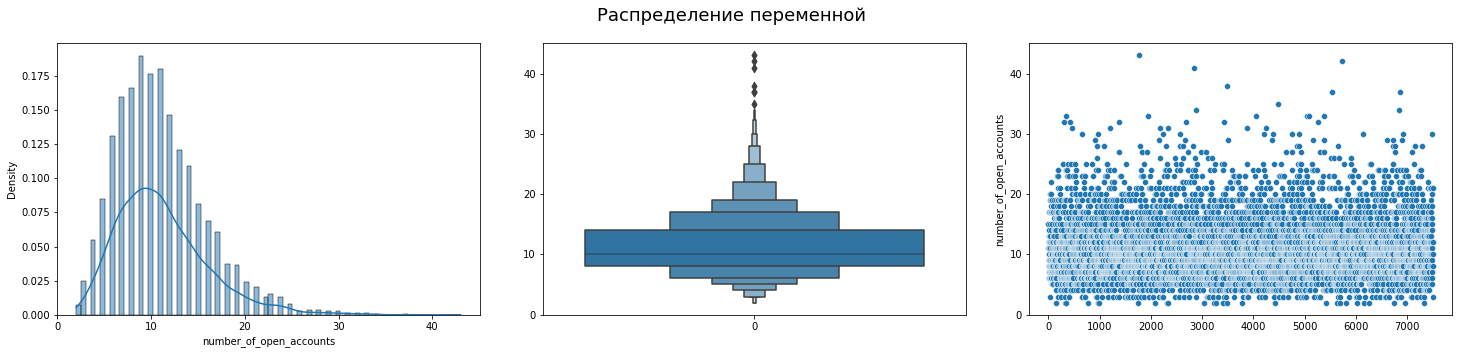

In [88]:
# Оценка распределения данных
distribution_of_quantitative_variables(number_of_open_accounts)

Есть небольшые выбросы и смещение данных относительно среднего в правыю сторону.

In [89]:
# Оценка распределения данных
years_of_credit_history = train_data_eda_num['years_of_credit_history']

Описательные статистики:
count   7500.00
mean      18.32
std        7.04
min        4.00
25%       13.50
50%       17.00
75%       21.80
max       57.70
Name: years_of_credit_history, dtype: float64


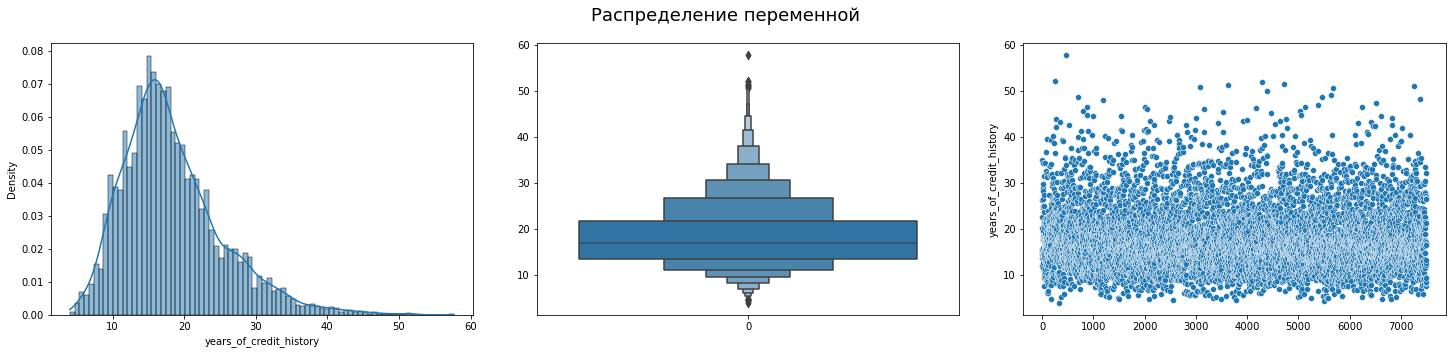

In [90]:
distribution_of_quantitative_variables(years_of_credit_history)


Есть небольшое смещение в правую сторону относительно среднего значения и выбросы.

In [91]:
# Оценка распределения данных
maximum_open_credit = train_data_eda_num['maximum_open_credit']

Описательные статистики:
count         7500.00
mean        945153.73
std       16026216.67
min              0.00
25%         279229.50
50%         478159.00
75%         793501.50
max     1304726170.00
Name: maximum_open_credit, dtype: float64


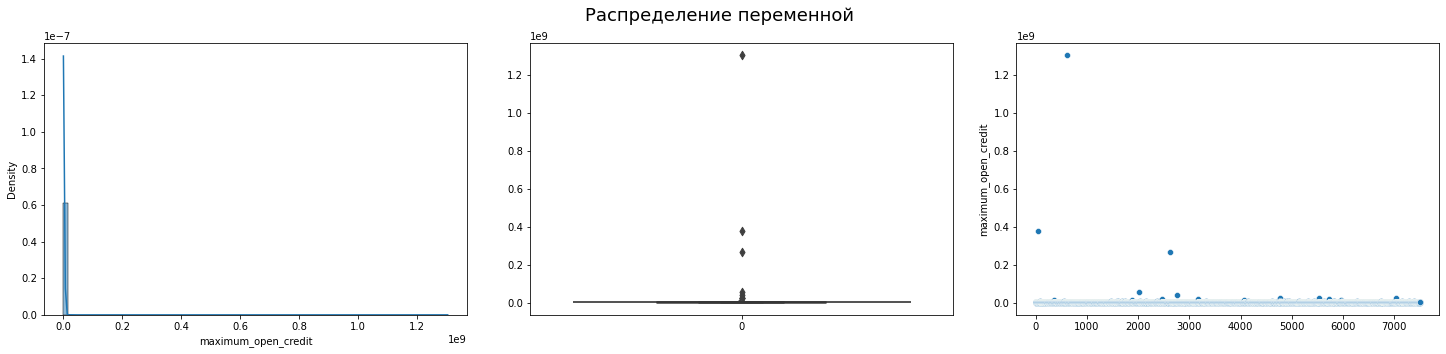

In [92]:
distribution_of_quantitative_variables(maximum_open_credit)


Наблюдается значительный выброс равный 1304726170.

In [93]:
months_since_last_delinquent = train_data_eda_num['months_since_last_delinquent']

Описательные статистики:
count   7500.00
mean      33.23
std       14.70
min        0.00
25%       32.00
50%       32.00
75%       32.00
max      118.00
Name: months_since_last_delinquent, dtype: float64


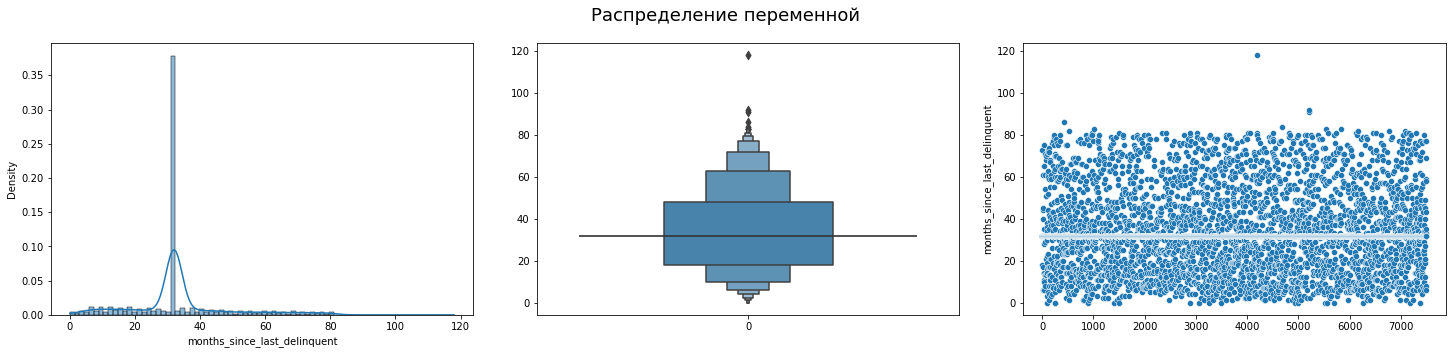

In [94]:
# Оценка распределения данных
distribution_of_quantitative_variables(months_since_last_delinquent)


Наблюдаются выбросы значений.

In [95]:
current_loan_amount = train_data_eda_num['current_loan_amount']

Описательные статистики:
count       7500.00
mean    11873177.45
std     31926122.97
min        11242.00
25%       180169.00
50%       309573.00
75%       519882.00
max     99999999.00
Name: current_loan_amount, dtype: float64


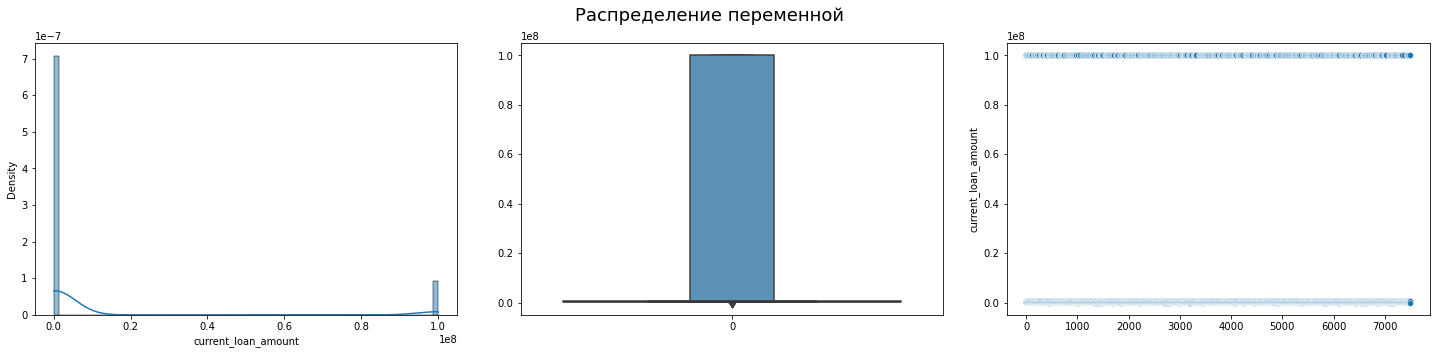

In [96]:
# Оценка распределения данных
distribution_of_quantitative_variables(current_loan_amount)

Есть значительный выброс значения равный 99999999.00 похожий на ошибку в данных.

In [97]:
current_credit_balance = train_data_eda_num['current_credit_balance']

Описательные статистики:
count      7500.00
mean     289833.24
std      317871.38
min           0.00
25%      114256.50
50%      209323.00
75%      360406.25
max     6506797.00
Name: current_credit_balance, dtype: float64


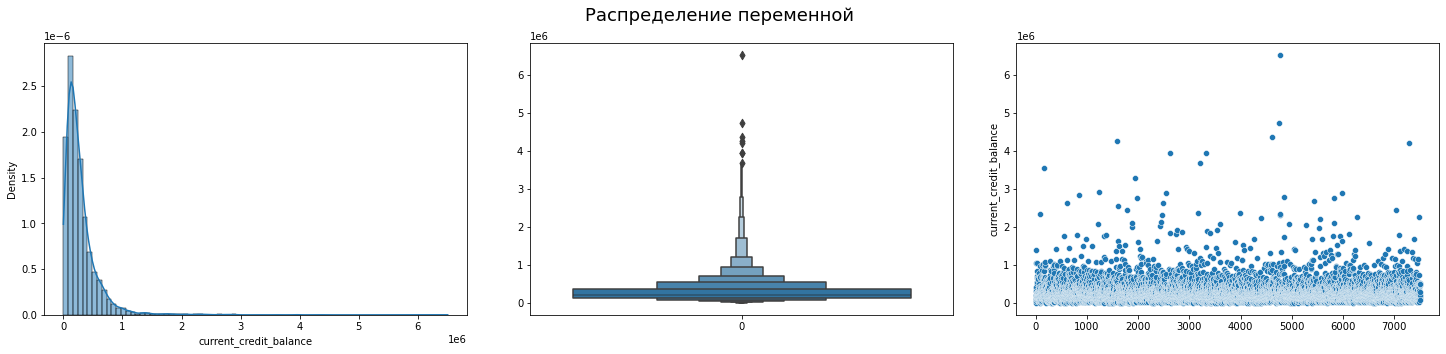

In [98]:
# Оценка распределения данных
distribution_of_quantitative_variables(current_credit_balance)


Имеются выбросы значений и смещение данных относительно среднего в правую сторону.

In [99]:
monthly_debt = train_data_eda_num['monthly_debt']

Описательные статистики:
count     7500.00
mean     18314.45
std      11926.76
min          0.00
25%      10067.50
50%      16076.50
75%      23818.00
max     136679.00
Name: monthly_debt, dtype: float64


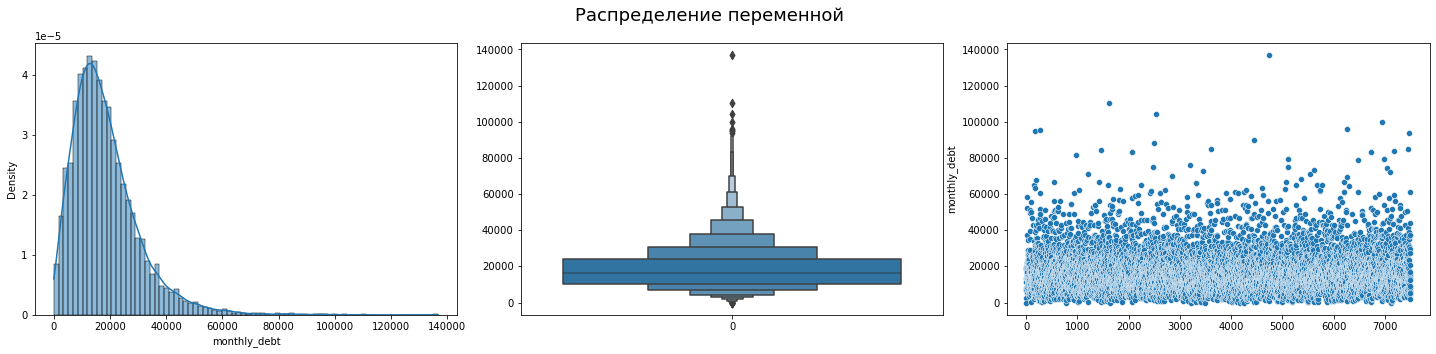

In [100]:
# Оценка распределения данных
distribution_of_quantitative_variables(monthly_debt)

Есть один значимый выброс.

In [101]:
credit_score = train_data_eda_num['credit_score']

Описательные статистики:
count   7500.00
mean    1063.88
std     1438.34
min      585.00
25%      718.00
50%      731.00
75%      740.00
max     7510.00
Name: credit_score, dtype: float64


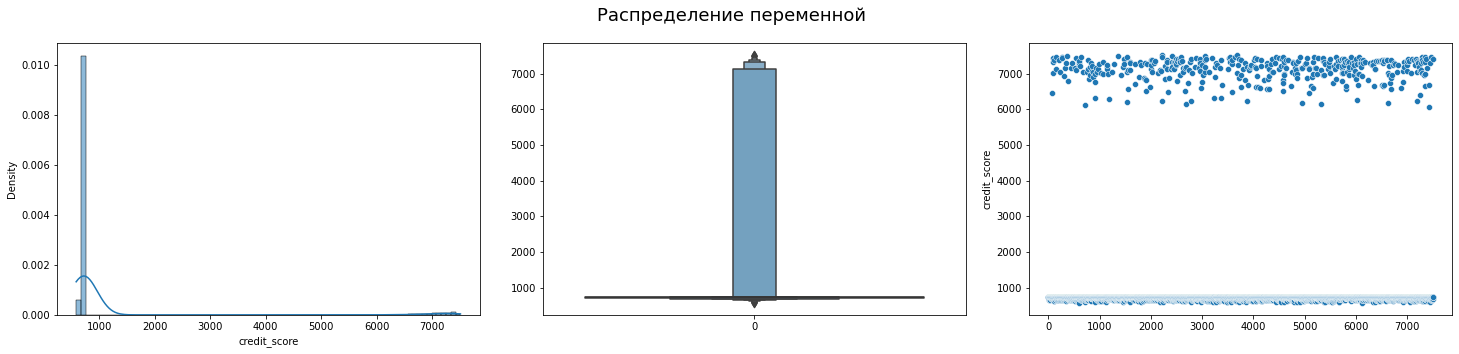

In [102]:
# Оценка распределения данных
distribution_of_quantitative_variables(credit_score)


Данные имеют интересный характер расперделения. Основаная часть данных лежит ниже значения 740, при этом есть значимое колличество значнией с оценкой 6000 и более.

Исследуем распределение категориальных переменных

In [103]:
def distribution_of_cat_variables(data_for_eda):
    
    fig, ax = plt.subplots(nrows=2, figsize=(20, 15))
    sns.set_style('whitegrid')
    
    # Categorical scatterplots
    sns.stripplot(data = data_for_eda, alpha=0.7, ax=ax[0])

    # Categorical distribution plots
    sns.boxplot(data = data_for_eda, ax=ax[0])

    # Categorical estimate plots
    sns.barplot(data = data_for_eda,  ax=ax[1])

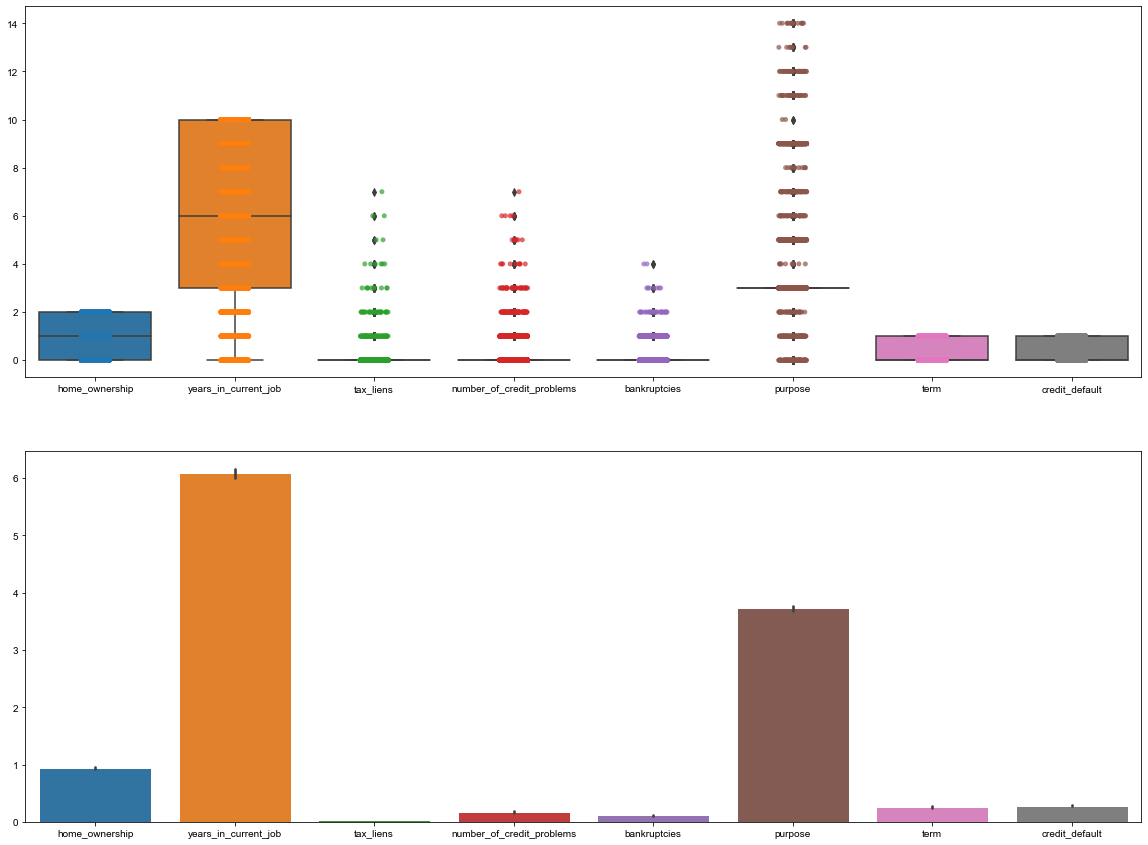

In [104]:
# Оценка распределения категорияльных переменных.
distribution_of_cat_variables(train_data_eda_cat)

Анализ распределения категориальных переменных показывает, что переменные tax_liens, number_of_credit_problems, bunkruptcies имеют незначительные выбросы. С 4 до 8 для tax_liens, с 6 до 8 для number_of_credit_problems и 4 для bunkruptcies. Значения для остальных переменных распеределены относительно равномерно в предалах диапазона изменения переменной.

# Фильтрация выбросов

На основании анализа распеределения переменных выполнненого в предыдущем разделе установленно, что все колличественые переменные имеют выросы, которые необходимо отфильтровать для проведения дальнейших исследований.

In [105]:
# Создадим для набора без выбросов отдельную перменную
train_data_eda_outliers = train_data_eda

Описательные статистики:
count      7500.00
mean    1321758.10
std      585807.21
min      164597.00
25%      931133.00
50%     1366391.72
75%     1471079.75
max     4225847.00
Name: annual_income, dtype: float64


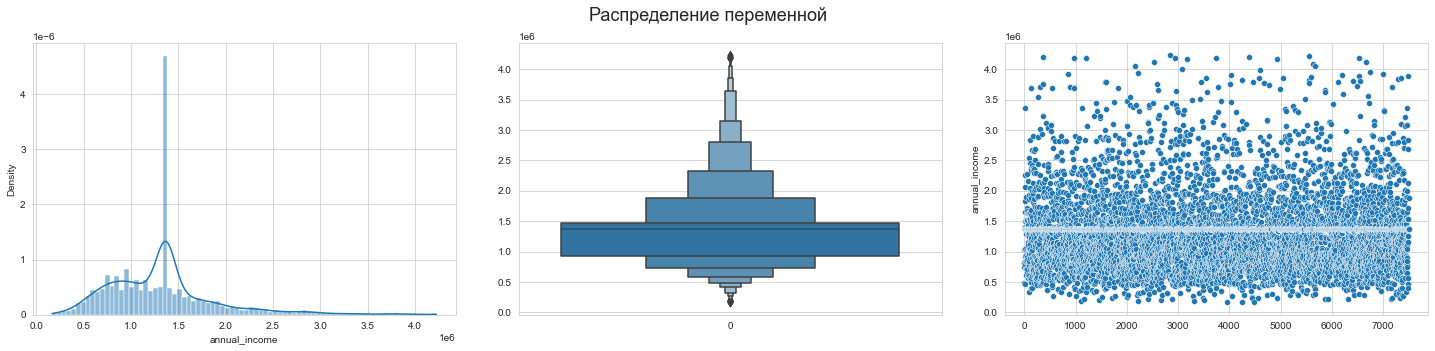

In [106]:
# Заменим все значения больште 99 процентиля средним 
train_data_eda_outliers.loc[train_data_eda_outliers['annual_income'] > 
                                            train_data_eda_outliers['annual_income'].quantile(.99), 'annual_income'] = train_data_eda_outliers['annual_income'].median()
# Проверка полученного результата
distribution_of_quantitative_variables(train_data_eda_outliers['annual_income'])

Описательные статистики:
count   7500.00
mean      10.96
std        4.55
min        2.00
25%        8.00
50%       10.00
75%       14.00
max       27.00
Name: number_of_open_accounts, dtype: float64


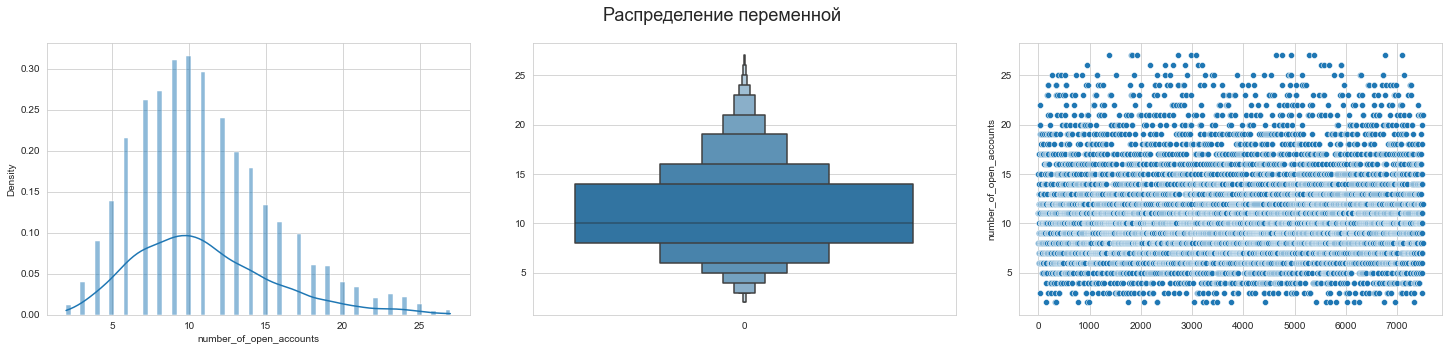

In [107]:
# Заменим все значения больште 99 процентиля средним 
train_data_eda_outliers.loc[train_data_eda_outliers['number_of_open_accounts'] > 
train_data_eda_outliers['number_of_open_accounts'].quantile(.99), 'number_of_open_accounts'] = train_data_eda_outliers['number_of_open_accounts'].median()

# Проверка полученного результата
distribution_of_quantitative_variables(train_data_eda_outliers['number_of_open_accounts'])

Описательные статистики:
count   7500.00
mean      17.83
std        6.19
min        4.00
25%       13.50
50%       17.00
75%       21.40
max       36.50
Name: years_of_credit_history, dtype: float64


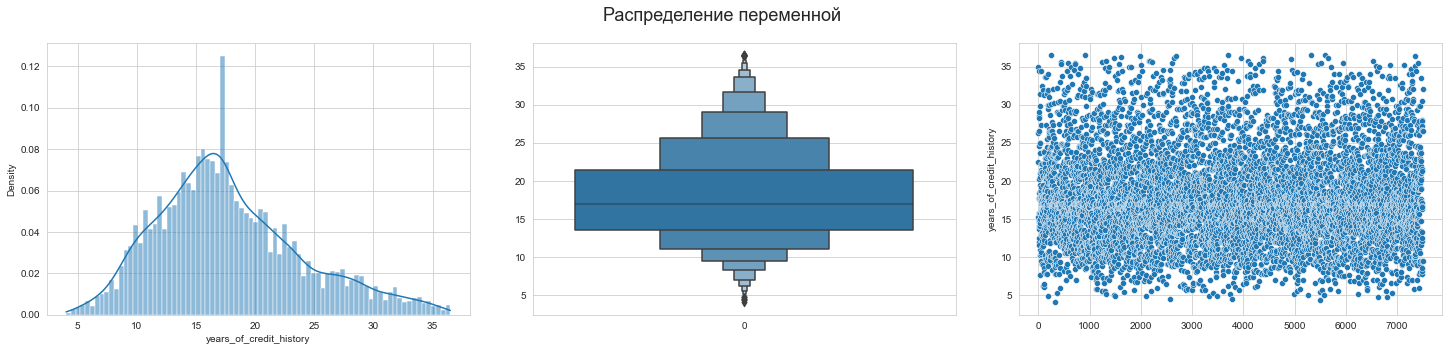

In [108]:
# Заменим все значения больште 98 процентиля средним 
train_data_eda_outliers.loc[train_data_eda_outliers['years_of_credit_history'] > 
train_data_eda_outliers['years_of_credit_history'].quantile(.98), 'years_of_credit_history'] = train_data_eda_outliers['years_of_credit_history'].median()

# Проверка полученного результата
distribution_of_quantitative_variables(train_data_eda_outliers['years_of_credit_history'])

Описательные статистики:
count      7500.00
mean     603753.11
std      483459.07
min           0.00
25%      279229.50
50%      478153.50
75%      779339.00
max     3567982.00
Name: maximum_open_credit, dtype: float64


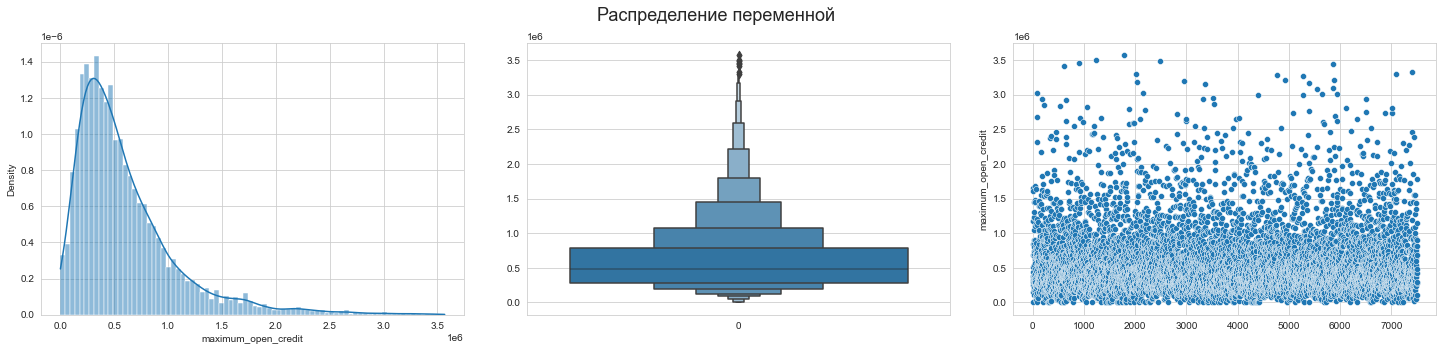

In [109]:
# Заменим все значения больште 99 процентиля средним 
train_data_eda_outliers.loc[train_data_eda_outliers['maximum_open_credit'] > 
train_data_eda_outliers['maximum_open_credit'].quantile(.99), 'maximum_open_credit'] = train_data_eda_outliers['maximum_open_credit'].median()

# Проверка полученного результата
distribution_of_quantitative_variables(train_data_eda_outliers['maximum_open_credit'])

Описательные статистики:
count   7500.00
mean      32.84
std       14.05
min        0.00
25%       32.00
50%       32.00
75%       32.00
max       79.00
Name: months_since_last_delinquent, dtype: float64


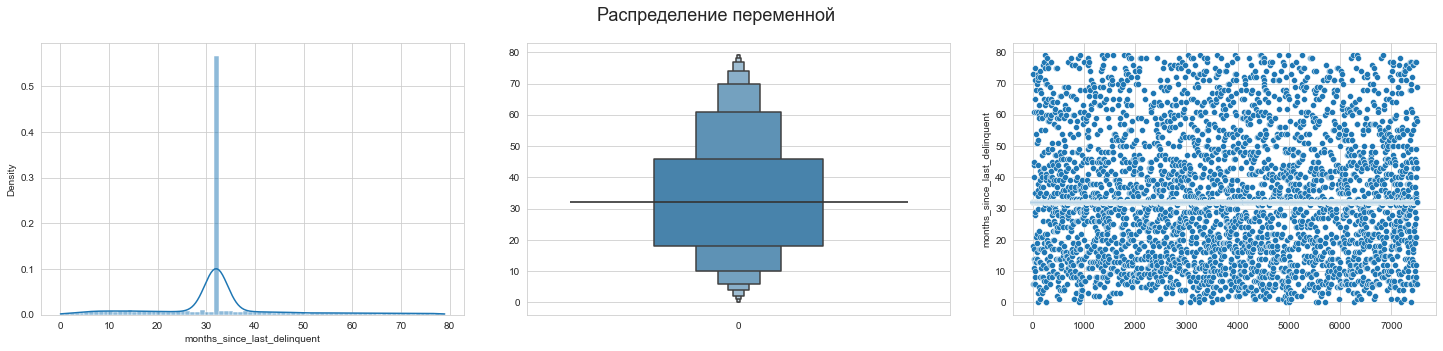

In [110]:
# Заменим все значения больште 99 процентиля средним 
train_data_eda_outliers.loc[train_data_eda_outliers['months_since_last_delinquent'] > 
train_data_eda_outliers['months_since_last_delinquent'].quantile(.99), 'months_since_last_delinquent'] = train_data_eda_outliers['months_since_last_delinquent'].median()

# Проверка полученного результата
distribution_of_quantitative_variables(train_data_eda_outliers['months_since_last_delinquent'])

Описательные статистики:
count     7500.00
mean    309088.03
std     171393.74
min      11242.00
25%     180169.00
50%     309567.50
75%     396929.50
max     789030.00
Name: current_loan_amount, dtype: float64


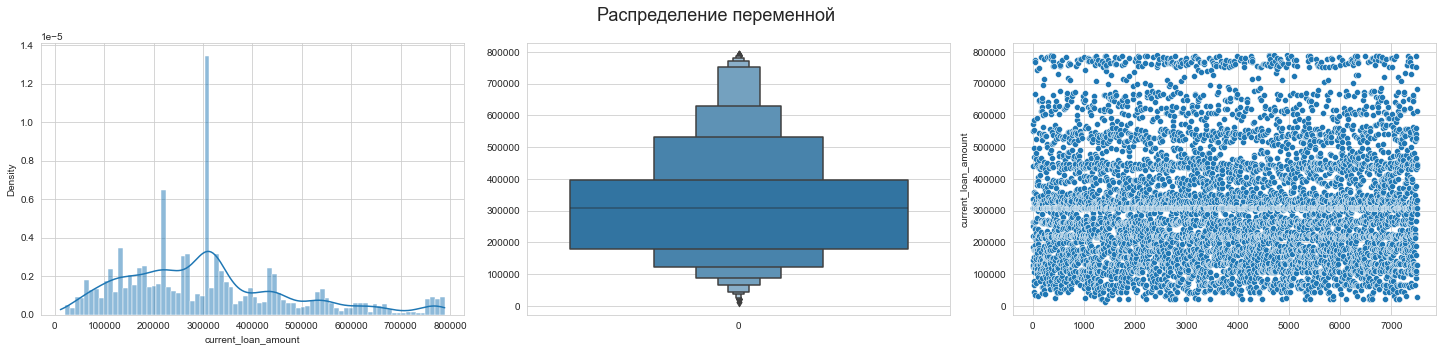

In [111]:
# Заменим все значения равное 99999999.00 на среднее

train_data_eda_outliers.loc[train_data_eda_outliers['current_loan_amount'] == 
99999999.00, 'current_loan_amount'] = train_data_eda_outliers['current_loan_amount'].median()

# Проверка полученного результата
distribution_of_quantitative_variables(train_data_eda_outliers['current_loan_amount'])

Описательные статистики:
count      7500.00
mean     268542.86
std      225117.20
min           0.00
25%      114256.50
50%      209313.50
75%      350887.25
max     1483026.00
Name: current_credit_balance, dtype: float64


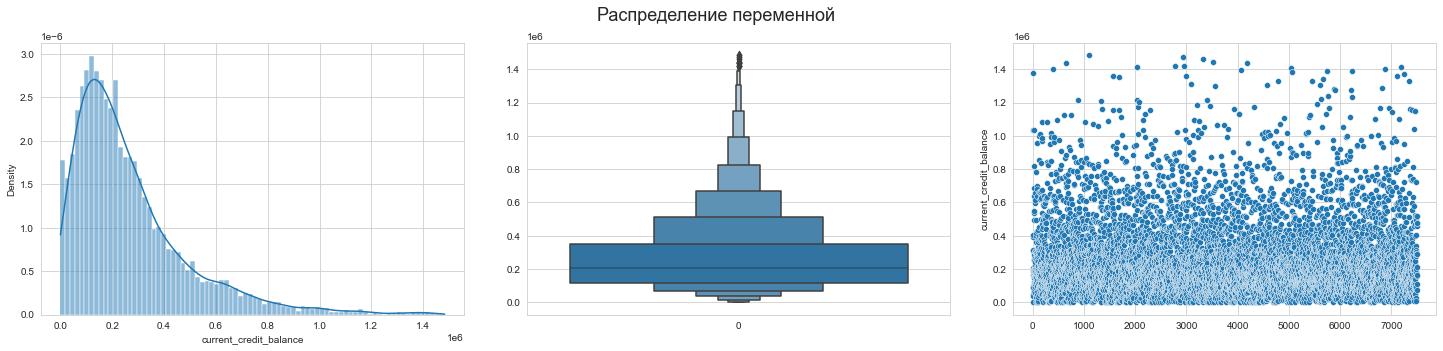

In [112]:
# Заменим все значения больште 99 процентиля средним 
train_data_eda_outliers.loc[train_data_eda_outliers['current_credit_balance'] > 
train_data_eda_outliers['current_credit_balance'].quantile(.99), 'current_credit_balance'] = train_data_eda_outliers['current_credit_balance'].median()

# Проверка полученного результата
distribution_of_quantitative_variables(train_data_eda_outliers['current_credit_balance'])

Описательные статистики:
count    7500.00
mean    17757.48
std     10550.74
min         0.00
25%     10067.50
50%     16075.75
75%     23433.75
max     58113.00
Name: monthly_debt, dtype: float64


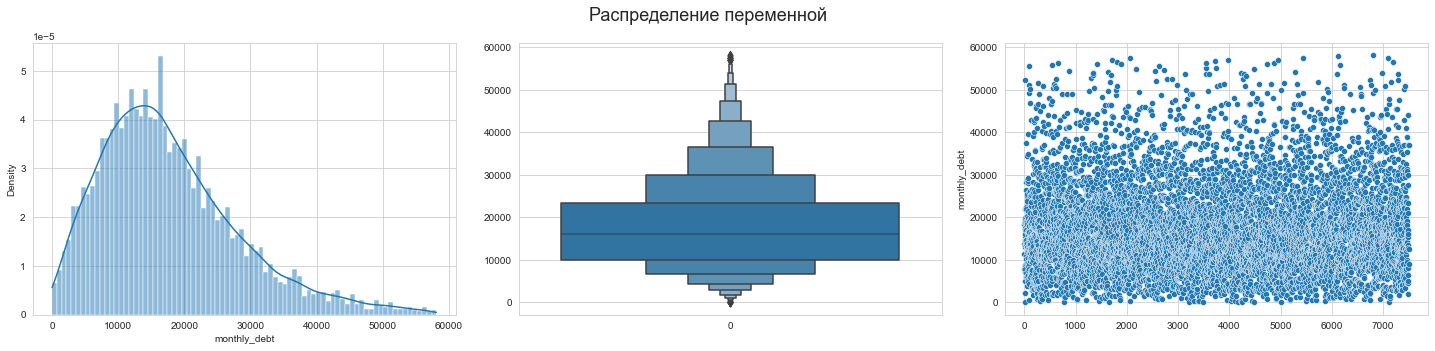

In [113]:
# Заменим все значения больште 99 процентиля средним 
train_data_eda_outliers.loc[train_data_eda_outliers['monthly_debt'] > 
train_data_eda_outliers['monthly_debt'].quantile(.99), 'monthly_debt'] = train_data_eda_outliers['monthly_debt'].median()

# Проверка полученного результата
distribution_of_quantitative_variables(train_data_eda_outliers['monthly_debt'])

Переменная credit_score разделение на два дипазона.

In [114]:
# Колличество занчений больших 5000
sum(train_data_eda_outliers['credit_score'] > 5000)

400

In [115]:
# Колличество занчений меньших 5000
sum(train_data_eda_outliers['credit_score'] < 5000)

7100

In [116]:
# Колличество занчений лежащих в интервале от 3000 до 5000
sum((train_data_eda_outliers['credit_score'] >= 3000) & (train_data_eda_outliers['credit_score'] <= 5000))

0

Оставим перпенну credit_score без изменений.

# Исследуем взаимоотношения

In [117]:

# Выделим категориальные признаки в отдельный набор данных
train_data_eda_outliers_cat = train_data_eda_outliers[['home_ownership',
                                     'years_in_current_job',
                                     'tax_liens',
                                     'number_of_credit_problems',
                                     'bankruptcies',
                                     'purpose',
                                     'term',
                                     'credit_default']]

# Выделим колличественные признаки и пермеменную credit_default  в отдельный набор данных
train_data_eda_outliers_num_credit_default = train_data_eda_outliers[['annual_income',
                                     'number_of_open_accounts',
                                     'years_of_credit_history',
                                     'maximum_open_credit',
                                     'months_since_last_delinquent',
                                     'current_loan_amount',
                                     'current_credit_balance',
                                     'monthly_debt',
                                     'credit_score',
                                     'credit_default']]

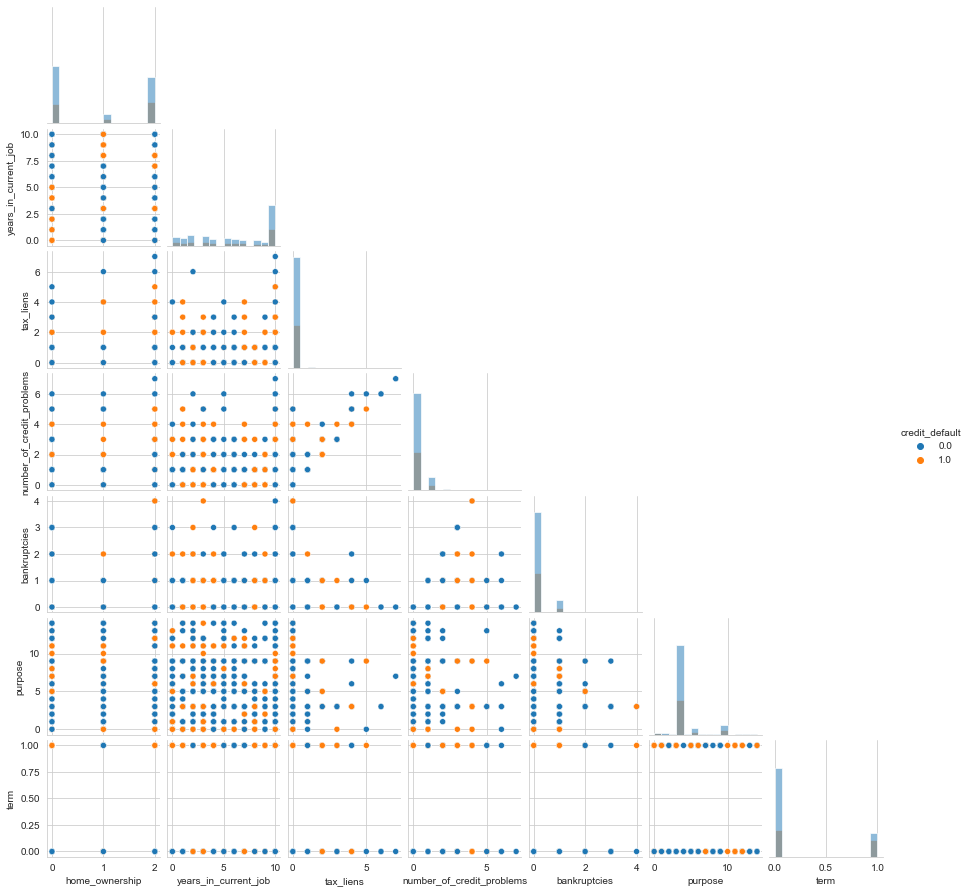

In [118]:
# Постороим график взаимотношения целевой переменной credit_default с остальными категориальными переменными 
sns.pairplot(data=train_data_eda_outliers_cat, hue="credit_default", height=1.8, corner=True, diag_kind="hist")


Анализ графика показывает, что явных взаимоотношений целевой перменной с другими не наблюдается

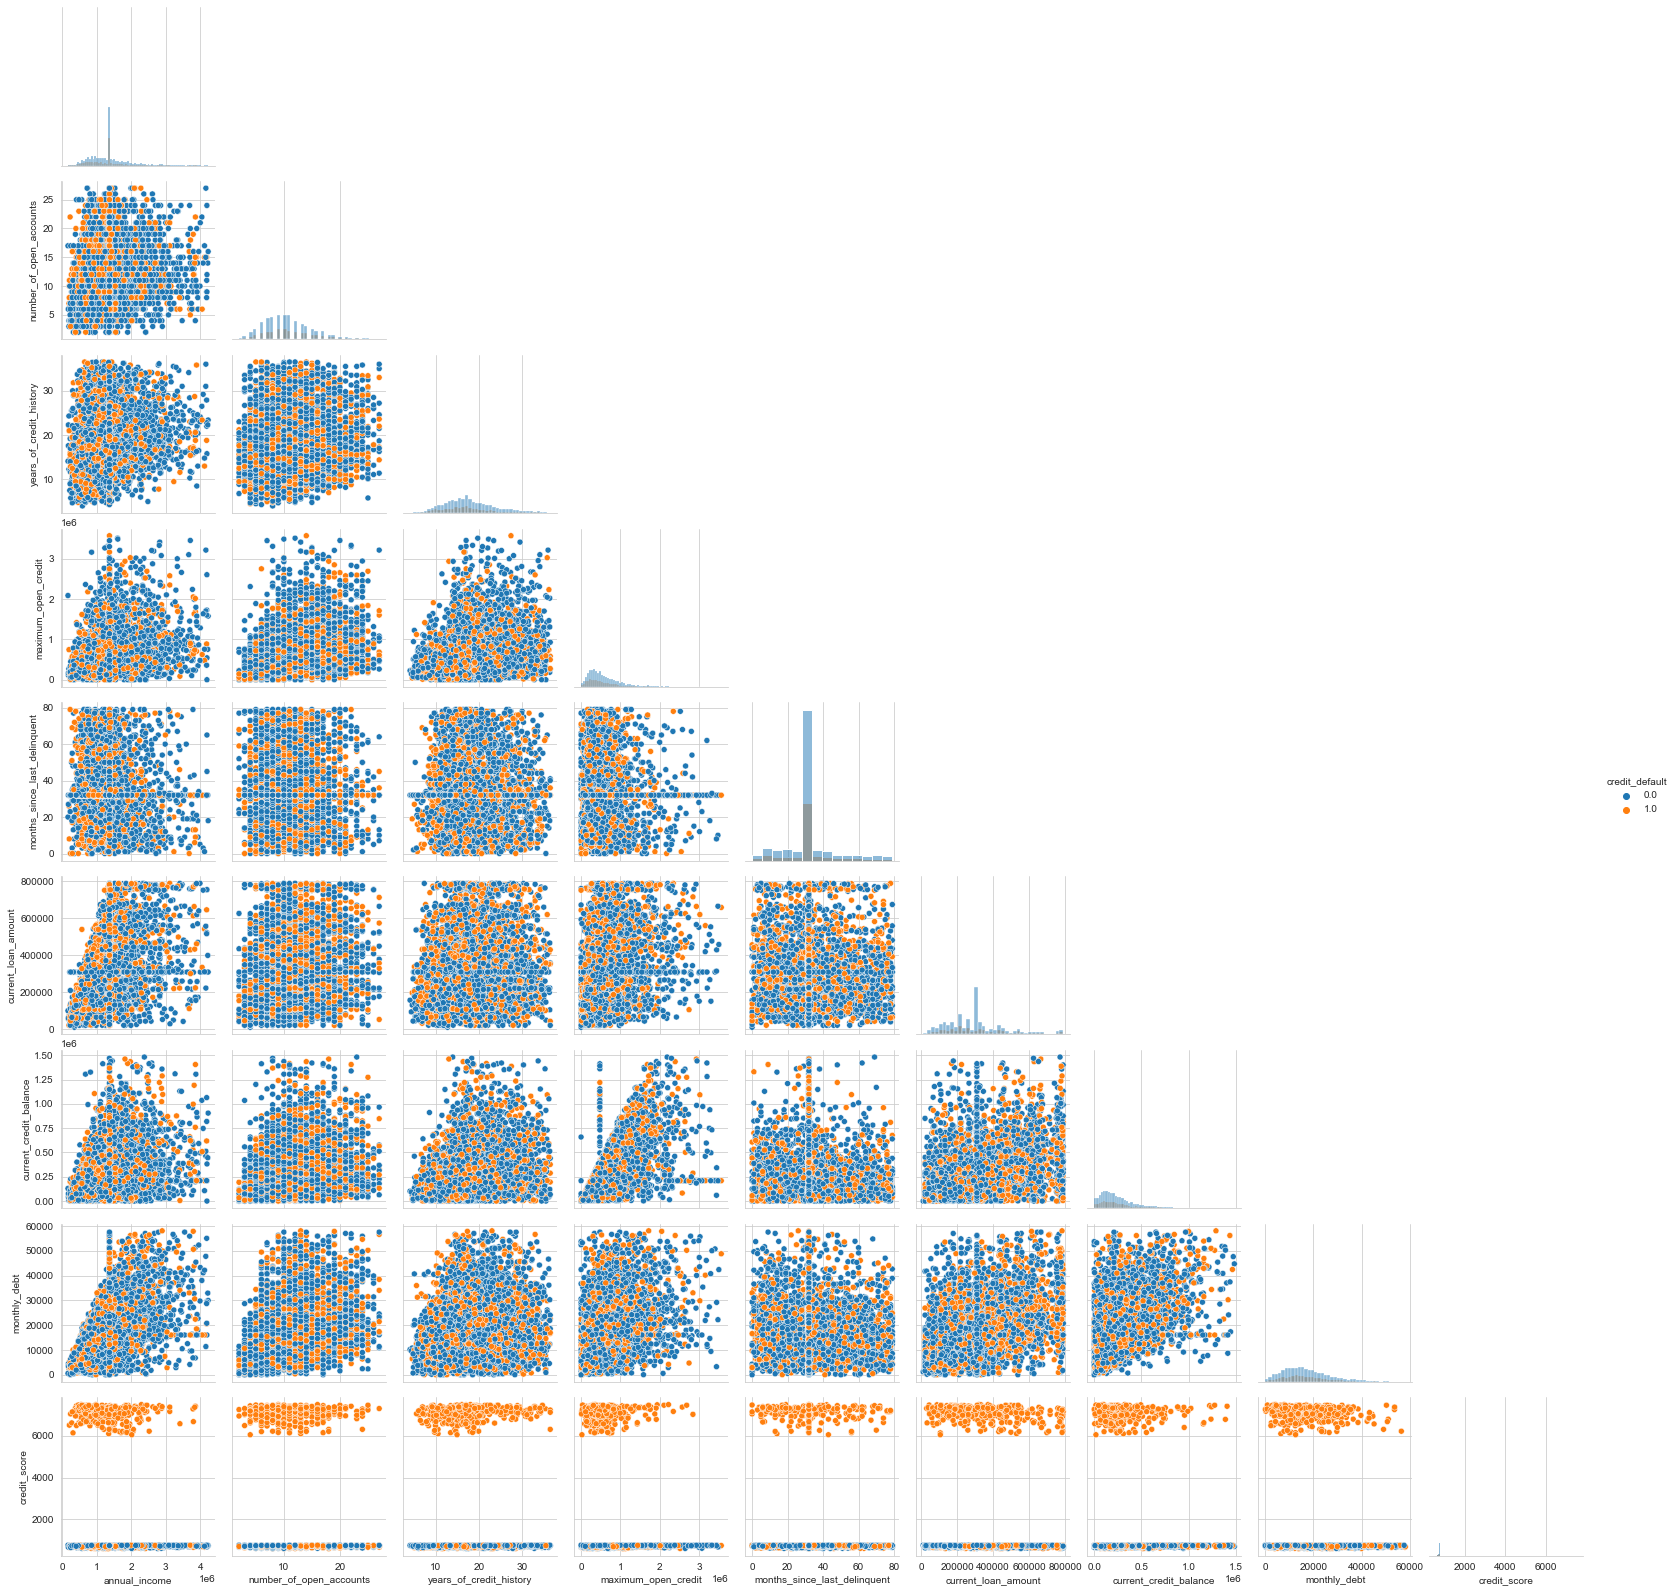

In [119]:
# Постороим график взаимотношения целевой переменной credit_default с колличественными переменными  
sns.pairplot(data=train_data_eda_outliers_num_credit_default, hue="credit_default", corner=True, diag_kind="hist")


Из графика видно, что сильная положитеьня связь наблюдается с перменной credit_score причем в основной массе со значениями > 5000.


Для оценики силы взаимсвязи между переменным построим диагональную корриляционную матрицу.

<AxesSubplot:>

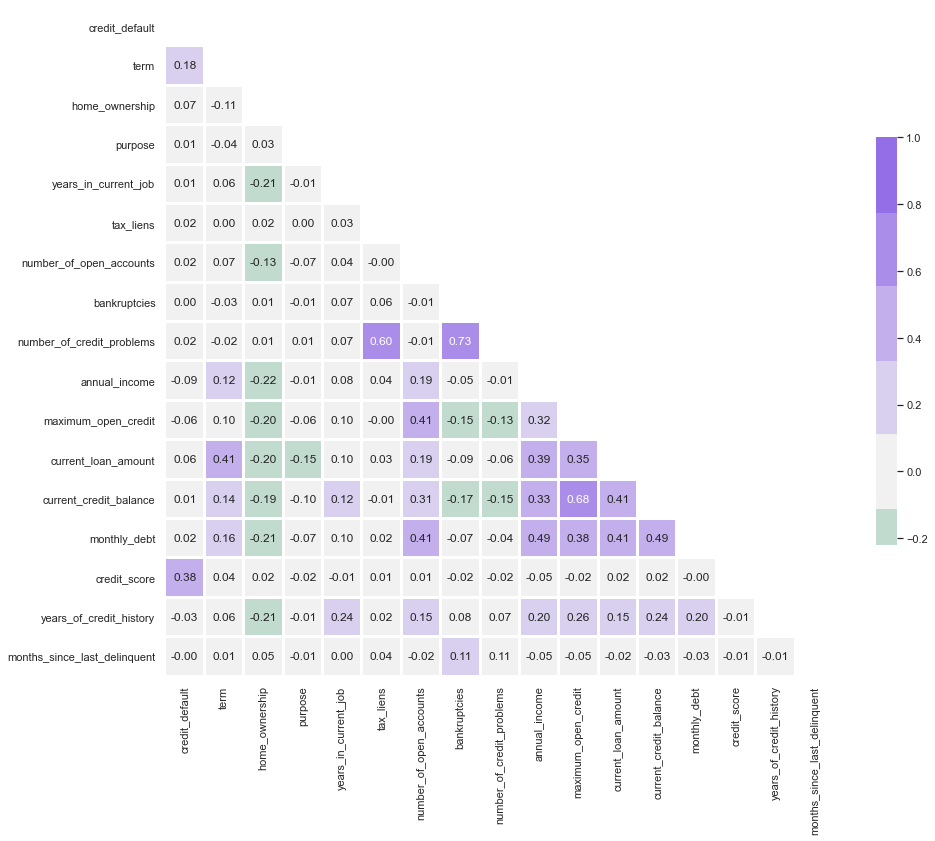

In [120]:
# Постороение диагональной корриляционной матрицы.

sns.set_theme(style="white")

# Compute the correlation matrix
corr = train_data_eda_outliers.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9, )

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True, fmt='.2f',
            square=True, linewidths=2, cbar_kws={"shrink": .5})

Анализ матрици коррляции показывает, что есть значимая корреляция > 0.6 между следующим переменными

current_credit_balance и maximum_open_credit
number_of_credit_problems и tax_liens
number_of_credit_problems и bankruptcies
Между остальными переменными значимой отрицательно или положительной корреляции не наблюдается.

In [121]:
train_data_fe = train_data_eda_outliers

In [122]:
train_data_fe.head().T

0          1          2         3  \
credit_default                    0.00       1.00       0.00      0.00   
term                              0.00       1.00       0.00      0.00   
home_ownership                    1.00       1.00       0.00      1.00   
purpose                           3.00       3.00       3.00      3.00   
years_in_current_job             10.00      10.00       8.00      6.00   
tax_liens                         0.00       0.00       0.00      0.00   
number_of_open_accounts          11.00      15.00      11.00      8.00   
bankruptcies                      1.00       0.00       0.00      1.00   
number_of_credit_problems         1.00       0.00       0.00      1.00   
annual_income                482087.00 1025487.00  751412.00 805068.00   
maximum_open_credit          685960.00 1181730.00 1182434.00 147400.00   
current_loan_amount          309573.00  264968.00  309573.00 121396.00   
current_credit_balance        47386.00  394972.00  308389.00  95855.00   
monthly_debt                   7914.00   18373.00   13651.00  11338.00   
credit_score                    749.00     737.00     742.00    694.00   
years_of_credit_history          26.30      15.30      35.00     22.50   
months_since_last_delinquent     32.00      32.00      32.00     32.00   

                                     4  
credit_default                    0.00  
term                              0.00  
home_ownership                    2.00  
purpose                           3.00  
years_in_current_job              8.00  
tax_liens                         0.00  
number_of_open_accounts          13.00  
bankruptcies                      0.00  
number_of_credit_problems         1.00  
annual_income                776264.00  
maximum_open_credit          385836.00  
current_loan_amount          125840.00  
current_credit_balance        93309.00  
monthly_debt                   7180.00  
credit_score                    719.00  
years_of_credit_history          13.60  
months_since_last_delinquent     32.00

Создадим переменную описывающую оставшиеся свободные средства после уплаты текущего основгого долга по кредиту

In [123]:
# Создание переменной free_balance
train_data_fe['free_balance'] = train_data_fe['annual_income'] / 12 - train_data_fe['monthly_debt']

Описательные статистики:
count     7500.00
mean     92389.03
std      44580.81
min      10294.92
25%      62446.98
50%      88786.70
75%     107582.07
max     335279.08
Name: free_balance, dtype: float64


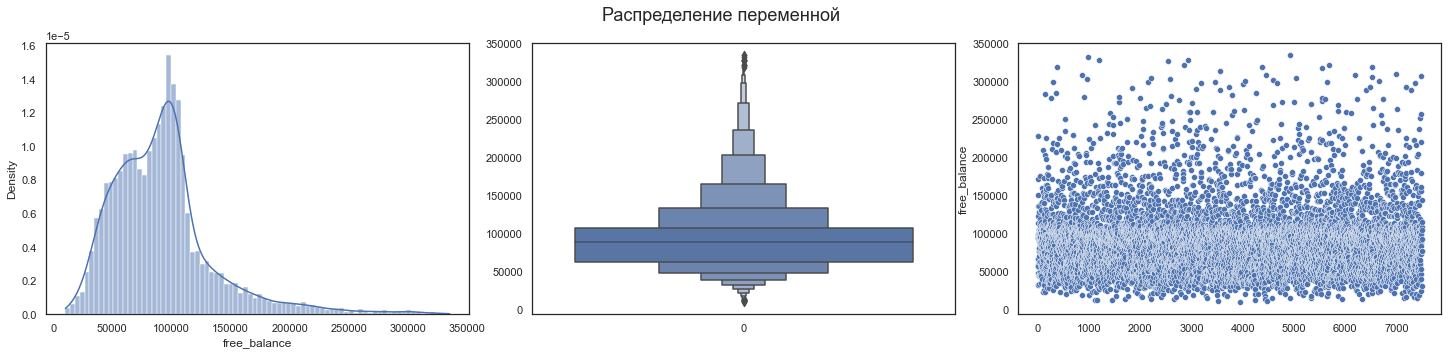

In [124]:
# Оценка распределения перемнной free_balance
distribution_of_quantitative_variables(train_data_fe['free_balance'])

# Масштабирование

In [125]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [126]:
train_data_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   credit_default                7500 non-null   float64
 1   term                          7500 non-null   int64  
 2   home_ownership                7500 non-null   int64  
 3   purpose                       7500 non-null   int32  
 4   years_in_current_job          7500 non-null   float64
 5   tax_liens                     7500 non-null   float64
 6   number_of_open_accounts       7500 non-null   float64
 7   bankruptcies                  7500 non-null   float64
 8   number_of_credit_problems     7500 non-null   float64
 9   annual_income                 7500 non-null   float64
 10  maximum_open_credit           7500 non-null   float64
 11  current_loan_amount           7500 non-null   float64
 12  current_credit_balance        7500 non-null   float64
 13  mon

In [127]:
# Список признаков
train_data_fe.columns.tolist()

['credit_default',
 'term',
 'home_ownership',
 'purpose',
 'years_in_current_job',
 'tax_liens',
 'number_of_open_accounts',
 'bankruptcies',
 'number_of_credit_problems',
 'annual_income',
 'maximum_open_credit',
 'current_loan_amount',
 'current_credit_balance',
 'monthly_debt',
 'credit_score',
 'years_of_credit_history',
 'months_since_last_delinquent',
 'free_balance']

In [128]:
# Отбор признков для масштабирования 
feature_names = ['credit_default',
 'term',
 'home_ownership',
 'purpose',
 'years_in_current_job',
 'tax_liens',
 'number_of_open_accounts',
 'bankruptcies',
 'number_of_credit_problems',
 'annual_income',
 'maximum_open_credit',
 'current_loan_amount',
 'current_credit_balance',
 'monthly_debt',
 'credit_score',
 'years_of_credit_history',
 'months_since_last_delinquent',
 'free_balance']

# Удаление из набора признаков целеовой переменной credit_score
feature_names.remove('credit_default')

# Проверека результата 
feature_names

['term',
 'home_ownership',
 'purpose',
 'years_in_current_job',
 'tax_liens',
 'number_of_open_accounts',
 'bankruptcies',
 'number_of_credit_problems',
 'annual_income',
 'maximum_open_credit',
 'current_loan_amount',
 'current_credit_balance',
 'monthly_debt',
 'credit_score',
 'years_of_credit_history',
 'months_since_last_delinquent',
 'free_balance']

In [129]:
# Зададим отдельно целевую переменную 
target_var = train_data_fe['credit_default']

In [130]:
target_var.shape

(7500,)

In [131]:
# Отмасштабируем признаки 
train_data_scaling = scaler.fit_transform(train_data_fe[feature_names].astype(float))

# Создадим набор данных с отмасштабированными признаками
train_data_scaling = pd.DataFrame(train_data_scaling, columns=feature_names)

# Проверка результата 
train_data_scaling.head(10).T

0     1     2     3     4     5     6     7  \
term                         -0.59  1.69 -0.59 -0.59 -0.59  1.69 -0.59 -0.59   
home_ownership                0.06  0.06 -0.99  0.06  1.11  1.11 -0.99  1.11   
purpose                      -0.35 -0.35 -0.35 -0.35 -0.35  2.54  0.61  2.54   
years_in_current_job          1.08  1.08  0.53 -0.02  0.53  0.25  1.08  1.08   
tax_liens                    -0.11 -0.11 -0.11 -0.11 -0.11 -0.11 -0.11 -0.11   
number_of_open_accounts       0.01  0.89  0.01 -0.65  0.45  0.23 -0.43  0.45   
bankruptcies                  2.55 -0.34 -0.34  2.55 -0.34 -0.34 -0.34 -0.34   
number_of_credit_problems     1.66 -0.34 -0.34  1.66  1.66 -0.34 -0.34 -0.34   
annual_income                -1.43 -0.51 -0.97 -0.88 -0.93  0.08  0.32 -0.48   
maximum_open_credit           0.17  1.20  1.20 -0.94 -0.45 -0.49 -0.45 -0.57   
current_loan_amount           0.00 -0.26  0.00 -1.10 -1.07  0.16  0.00 -0.34   
current_credit_balance       -0.98  0.56  0.18 -0.77 -0.78 -0.46 -0.96 -0.80   
monthly_debt                 -0.93  0.06 -0.39 -0.61 -1.00  0.09 -1.46  0.19   
credit_score                 -0.22 -0.23 -0.22 -0.26 -0.24 -0.23 -0.22 -0.25   
years_of_credit_history       1.37 -0.41  2.78  0.76 -0.68 -0.52  0.40 -0.94   
months_since_last_delinquent -0.06 -0.06 -0.06 -0.06 -0.06 -0.06  2.86 -1.06   
free_balance                 -1.35 -0.57 -0.97 -0.82 -0.78  0.06  0.70 -0.57   

                                 8     9  
term                         -0.59  1.69  
home_ownership               -0.99 -0.99  
purpose                       0.61 -0.35  
years_in_current_job         -0.30 -1.40  
tax_liens                    -0.11 -0.11  
number_of_open_accounts       1.33 -0.21  
bankruptcies                  2.55 -0.34  
number_of_credit_problems     1.66 -0.34  
annual_income                 0.08  0.08  
maximum_open_credit          -1.25 -0.19  
current_loan_amount          -1.05  1.54  
current_credit_balance       -1.19 -0.28  
monthly_debt                 -1.68 -0.01  
credit_score                 -0.23 -0.23  
years_of_credit_history      -0.34  1.09  
months_since_last_delinquent -0.06 -1.91  
free_balance                  0.48  0.09

In [132]:
# Импорт библиотеки для разбиения 
from sklearn.model_selection import train_test_split

In [133]:

X = train_data_scaling[feature_names]
y = train_data_fe['credit_default']

In [134]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=25)

In [135]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n' + classification_report(y_train_true, y_train_pred)+ '_' * 70+ '\n')
    print('TEST\n' + classification_report(y_test_true, y_test_pred)+ '_' * 70+ '\n')
    print('CONFUSION MATRIX\n'+ '_' * 70+ '\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [136]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import multilabel_confusion_matrix

# CatBoost

In [137]:
import catboost as catb

In [138]:
clf9 = catb.CatBoostClassifier(silent=True, random_state=21).fit(X_train, y_train)

In [139]:
y_train_pred = clf9.predict(X_train)
y_test_pred = clf9.predict(X_test)

In [140]:
get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      3746
         1.0       0.99      0.57      0.72      1504

    accuracy                           0.88      5250
   macro avg       0.92      0.78      0.82      5250
weighted avg       0.89      0.88      0.86      5250
______________________________________________________________________

TEST
              precision    recall  f1-score   support

         0.0       0.79      0.95      0.86      1641
         1.0       0.71      0.31      0.43       609

    accuracy                           0.78      2250
   macro avg       0.75      0.63      0.65      2250
weighted avg       0.77      0.78      0.75      2250
______________________________________________________________________

CONFUSION MATRIX
______________________________________________________________________

col_0           0.00  1.00
credit_default            
0.00            1565    76
1.00             422   

# Построение финальной модели

In [141]:
final_model = catb.CatBoostClassifier(n_estimators=1000, max_depth=5,
                                      silent=True, random_state=21)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN
              precision    recall  f1-score   support

         0.0       0.83      0.99      0.90      3746
         1.0       0.97      0.48      0.65      1504

    accuracy                           0.85      5250
   macro avg       0.90      0.74      0.77      5250
weighted avg       0.87      0.85      0.83      5250
______________________________________________________________________

TEST
              precision    recall  f1-score   support

         0.0       0.79      0.95      0.87      1641
         1.0       0.73      0.33      0.45       609

    accuracy                           0.79      2250
   macro avg       0.76      0.64      0.66      2250
weighted avg       0.78      0.79      0.75      2250
______________________________________________________________________

CONFUSION MATRIX
______________________________________________________________________

col_0           0.00  1.00
credit_default            
0.00            1567    74
1.00             409   

Загрзука тестовых данных

In [142]:
# Загрузка тестовых даннх 
data_path = 'C:/Users/grani/Desktop/Project_2/course_project_test.csv'

In [143]:
test_data = pd.read_csv(data_path)
test_data.head()

Home Ownership  Annual Income Years in current job  Tax Liens  \
0           Rent            NaN              4 years       0.00   
1           Rent      231838.00               1 year       0.00   
2  Home Mortgage     1152540.00              3 years       0.00   
3  Home Mortgage     1220313.00            10+ years       0.00   
4  Home Mortgage     2340952.00              6 years       0.00   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     9.00                    12.50            220968.00   
1                     6.00                    32.70             55946.00   
2                    10.00                    13.70            204600.00   
3                    16.00                    17.00            456302.00   
4                    11.00                    23.60           1207272.00   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                       0.00                         70.00          0.00   
1                       0.00                          8.00          0.00   
2                       0.00                           NaN          0.00   
3                       0.00                         70.00          0.00   
4                       0.00                           NaN          0.00   

                Purpose        Term  Current Loan Amount  \
0    debt consolidation  Short Term            162470.00   
1  educational expenses  Short Term             78298.00   
2    debt consolidation  Short Term            200178.00   
3    debt consolidation  Short Term            217382.00   
4    debt consolidation   Long Term            777634.00   

   Current Credit Balance  Monthly Debt  Credit Score  
0               105906.00       6813.00           NaN  
1                46037.00       2318.00        699.00  
2               146490.00      18729.00       7260.00  
3               213199.00      27559.00        739.00  
4               425391.00      42605.00        706.00

Подготовка тестовыз данных

In [ ]:
# Приведение имен переменных к принятой для анализа форме 
test_data.columns = [i.replace(' ', '_').lower() for i in test_data.columns]

In [ ]:
# Проверка результата переиминования
test_data.columns.tolist()

In [ ]:
# Кодирование переменных 

# home_ownership
home_ownership_dict = {'Have Mortgage' : 0,
                       'Home Mortgage' : 0,  
                            'Own Home' : 1, 
                                'Rent' : 2}

test_data['home_ownership']= test_data['home_ownership'].map(home_ownership_dict)

# years_in_current_job
years_in_current_job_dict = {'< 1 year' : 0,
                             '1 year' : 1,  
                             '2 years' : 2, 
                             '3 years' : 3, 
                             '4 years' : 4, 
                             '5 years' : 5, 
                             '6 years' : 6, 
                             '7 years' : 7, 
                             '8 years' : 8, 
                             '9 years' : 9,
                             '10+ years' : 10}

test_data['years_in_current_job']= test_data['years_in_current_job'].map(years_in_current_job_dict)

# purpose
test_data['purpose']= LabelEncoder().fit_transform(test_data['purpose'])

# term
term_code, term_uniques =  pd.factorize(test_data['term'])
test_data['term'] = term_code

In [ ]:
# Проверка результатов
test_data.head()

In [ ]:
# Addressing missing or invalid data

# years_in_current_job
test_data['years_in_current_job'] = test_data['years_in_current_job'].fillna(10)

# bankruptcies
test_data['bankruptcies'] = test_data['bankruptcies'].fillna(0)

# annual_income
test_data['annual_income'] = test_data['annual_income'].fillna(test_data['annual_income'].mean())

# credit_score
test_data['credit_score'] = test_data['credit_score'].fillna(test_data['credit_score'].median())

# months_since_last_delinquent
test_data['months_since_last_delinquent'] = test_data['months_since_last_delinquent'].fillna(test_data['months_since_last_delinquent'].median())

# Создание переменной free_balance
test_data['free_balance'] = test_data['annual_income'] / 12 - test_data['monthly_debt']
test_data.info()

In [ ]:
# Масштабирование признаков 
test_data_scaling = scaler.fit_transform(test_data[feature_names].astype(float))

# Создадим набор данных с отмасштабированными признаками
test_data_scaling = pd.DataFrame(test_data_scaling, columns=feature_names)

# Проверка результата 
test_data_scaling.head().T

Прогноз на тестовых данных

In [ ]:
y_pred = final_model.predict(test_data_scaling[feature_names])


Интерпретация результатов

In [ ]:
result = pd.DataFrame({ 'Credit Default': y_pred })
result.head()

In [ ]:
# Проверка результатов
result['Credit Default'].value_counts()

In [ ]:
# Сохраниение результатов 
result.to_csv('GrankinMA_predictions.csv', sep=',', index=False, encoding='utf-8')